<a href="https://colab.research.google.com/github/GeorgeSere/Projects/blob/main/GitProject_games.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ПРОЕКТ "МАГАЗИН КОМПЬЮТЕРНЫХ ИГР"

# [ТЕМПЛЕЙТ]

In [ ]:
import pandas as pd
import numpy as np
import io
import sqlite3
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
from scipy import stats as st

In [ ]:
sns.set_style("whitegrid")

In [ ]:
plt.rcParams['figure.figsize'] = [15, 5]

In [ ]:
pd.options.display.float_format = '{:.2f}'.format

In [ ]:
con = sqlite3.connect('db')

def select(sql):
  return pd.read_sql(sql,con)

cur = con.cursor()

In [ ]:
def pass_value_barh(df):
    try:
        (
            (df.isna().mean()*100)
            .to_frame()
            .rename(columns = {0:'space'})
            .query('space > 0')
            .sort_values(by = 'space', ascending = True)
            .plot(kind = 'barh', figsize = (19,6), rot = 0, legend = False, fontsize = 16)
            .set_title('Пропуски(%)' + "\n", fontsize = 22, color = 'SteelBlue')    
        );    
    except:
        print('пропусков нет')

In [ ]:
def loss_rate():
  loss = df_filtered.shape[0] / df.shape[0]
  loss *= 100
  loss = 100 - loss
  loss = round(loss, 2)
  print('Потеряно', loss, '% данных.')

# ОПИСАНИЕ ПРОЕКТА:

В рамках данного проекта мы исследуем динамику продаж компьютерных игр для различных платформ до 2016 года, ответим на ряд интересующих вопросов и постараемся дать рекомендации интернет-магазину на следующий год.

**Задачи:**

**Проведём исследовательский анализ данных:**
* Сколько игр выпускалось в разные годы. Важны ли данные за все периоды?
* Как менялись продажи по платформам?
* За какой характерный срок появляются новые и исчезают старые платформы?
* Какой период подойдёт для построения прогнозов на 2017 год?
* Какие платформы лидируют по продажам, растут или падают? 
* Как влияют на продажи внутри одной популярной платформы отзывы пользователей и критиков?
* Что можно сказать о самых прибыльных жанрах? Выделяются ли жанры с высокими и низкими продажами?

**Составим портрет пользователя каждого региона (NA, EU, JP):**

* Самые популярные платформы (топ-5)
* Самые популярные жанры (топ-5)
* Влияет ли рейтинг ESRB на продажи в разных регионах?

**Проверим гипотезы:**
* Средние пользовательские рейтинги платформ Xbox One и PC одинаковые;
* Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные.



**Напишем общий вывод и составим рекомендации на следующий год**

# ЗНАКОМТСВО С ДАННЫМИ:

In [ ]:
try:
  from google.colab import files
  uploaded = files.upload()
  df = pd.read_csv(io.BytesIO(uploaded['games.csv']))
except:
  df = pd.read_csv('/datasets/games.csv',)

Saving games.csv to games (3).csv


In [ ]:
df.sample(5)

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
16692,Metal Gear Solid V: Ground Zeroes,PC,2014.00,Action,0.00,0.01,0.00,0.00,80.00,7.6,M
12721,Katekyoo Hitman Reborn! DS Flame Rumble XX - K...,DS,2010.00,Action,0.00,0.00,0.06,0.00,NaN,NaN,NaN
3311,Harry Potter and the Goblet of Fire,GBA,2005.00,Action,0.44,0.16,0.00,0.01,71.00,6,E
10876,Forever Kingdom,PS2,2001.00,Role-Playing,0.02,0.02,0.04,0.01,64.00,7.8,T
1310,WCW vs the World,PS,1998.00,Fighting,1.17,0.20,0.04,0.05,NaN,NaN,NaN


In [ ]:
df.duplicated().sum()

0

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


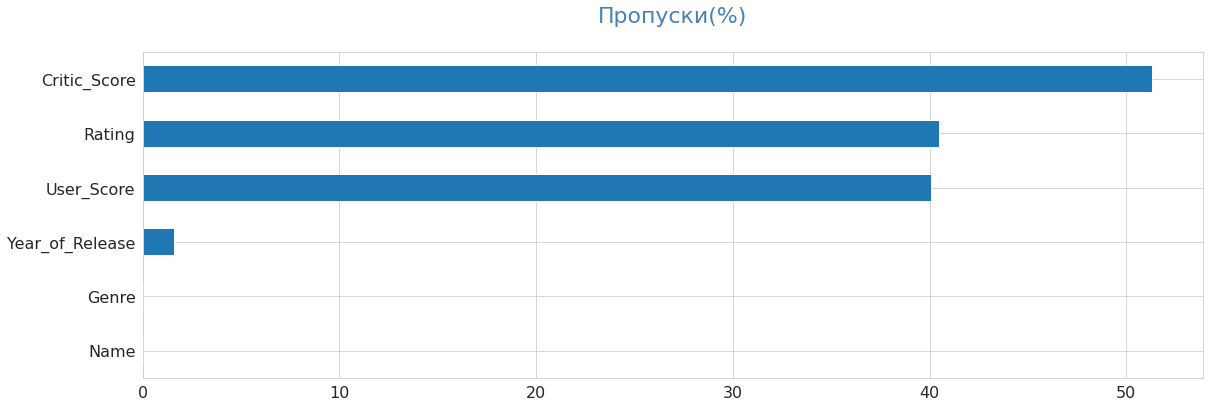

In [ ]:
pass_value_barh(df)

**Мы сразу можем выявить ряд проблем:**
* Некорректный стиль названия столбцов
* Наличие пропусков
* Неверный формат данных в ряде столбцов
* оценки от критиков и пользователей имеют разную шкалу (100 и 10 баллов соответственно) Это конечно не ошибка, но для удобства подровняем их



Наверняка мы увидим новые при более детальном взгляде на отдельные столбцы

# ПРЕДОБРАБОТКА ДАННЫХ:

##Приведём названия столбцов в **снейк кейс**:

In [ ]:
df.columns = df.columns.str.lower()

In [ ]:
df = df.rename(columns={'year_of_release' : 'release_year'})

Проверяем:

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   name          16713 non-null  object 
 1   platform      16715 non-null  object 
 2   release_year  16446 non-null  float64
 3   genre         16713 non-null  object 
 4   na_sales      16715 non-null  float64
 5   eu_sales      16715 non-null  float64
 6   jp_sales      16715 non-null  float64
 7   other_sales   16715 non-null  float64
 8   critic_score  8137 non-null   float64
 9   user_score    10014 non-null  object 
 10  rating        9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


##Преобразуем типы данных:

Мы заметили, что
* год выхода имеет формат float, изменим на int 
* оценка пользователей имеет формат object, изменим на float


Кажется отальные столбцы в порядке

In [ ]:
df['user_score'].unique()

array(['8', nan, '8.3', '8.5', '6.6', '8.4', '8.6', '7.7', '6.3', '7.4',
       '8.2', '9', '7.9', '8.1', '8.7', '7.1', '3.4', '5.3', '4.8', '3.2',
       '8.9', '6.4', '7.8', '7.5', '2.6', '7.2', '9.2', '7', '7.3', '4.3',
       '7.6', '5.7', '5', '9.1', '6.5', 'tbd', '8.8', '6.9', '9.4', '6.8',
       '6.1', '6.7', '5.4', '4', '4.9', '4.5', '9.3', '6.2', '4.2', '6',
       '3.7', '4.1', '5.8', '5.6', '5.5', '4.4', '4.6', '5.9', '3.9',
       '3.1', '2.9', '5.2', '3.3', '4.7', '5.1', '3.5', '2.5', '1.9', '3',
       '2.7', '2.2', '2', '9.5', '2.1', '3.6', '2.8', '1.8', '3.8', '0',
       '1.6', '9.6', '2.4', '1.7', '1.1', '0.3', '1.5', '0.7', '1.2',
       '2.3', '0.5', '1.3', '0.2', '0.6', '1.4', '0.9', '1', '9.7'],
      dtype=object)

In [ ]:
print(len(df.query("user_score=='tbd'")))

2424


Тут нам явно мешает текстовое значение **'tbd'**. Это аббревиатура, которая означает что значение ещё не определено и будет определено позже, так что такое значение **равносильно пропуску**. 

Оценка критиков от 0 до 100, оценка пользователей от 0 до 10, 'tbd'... Кажется мы используем данные с **Metacritic** 🤔

In [ ]:
df = df.replace('tbd', np.nan)

Проверяем:

In [ ]:
print(len(df.query("user_score=='tbd'")))

0


In [ ]:
df['user_score'] = df['user_score'].astype(float)

Тип данных в столбце 'release_year' я менять не буду. Я наконец выяснил, что это недоработанная функция и эксперементальный формат Int64 работает нестабильно.

Проверяем:

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   name          16713 non-null  object 
 1   platform      16715 non-null  object 
 2   release_year  16446 non-null  float64
 3   genre         16713 non-null  object 
 4   na_sales      16715 non-null  float64
 5   eu_sales      16715 non-null  float64
 6   jp_sales      16715 non-null  float64
 7   other_sales   16715 non-null  float64
 8   critic_score  8137 non-null   float64
 9   user_score    7590 non-null   float64
 10  rating        9949 non-null   object 
dtypes: float64(7), object(4)
memory usage: 1.4+ MB


##Разберемся с **пропусками**:

Мы уже узнали, что имеем: 
* **Большое количество** пропусков в столбцах *'critic_score'*, *'rating'*, *'user_score'*
* **Несколько процентов** пропусков в *'release_year'*
* Всего **по два** пропуска в *'name'* и *'genre'*

начнём с последнего

In [ ]:
df_filtered = df
df_filtered.to_sql('df_filtered',con,index=False,if_exists='replace')

sql = '''
SELECT t.* from df_filtered t
WHERE t.name IS null
'''
select(sql)

,name,platform,release_year,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,None,GEN,1993.00,None,1.78,0.53,0.00,0.08,None,None,None
1,None,GEN,1993.00,None,0.00,0.00,0.03,0.00,None,None,None


Удалим эти строки


In [ ]:
df_filtered['release_year'].isnull().sum()

269

Пропусков не критично много и они мешают нам привести столбец в красивый формат. Мы **удалим эти строки**

In [ ]:
sql = '''
SELECT t.* from df_filtered t
WHERE t.name NOT null
'''
df_filtered = select(sql)

In [ ]:
sql = '''
SELECT t.* from df_filtered t
WHERE t.release_year NOT null
'''
df_filtered = select(sql)

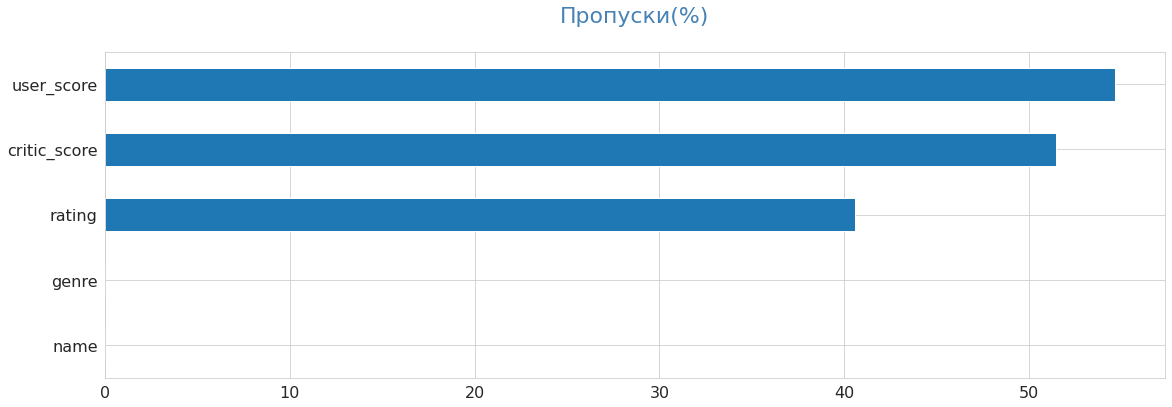

In [ ]:
pass_value_barh(df_filtered)

Теперь посмотрим на более значительные пропуски.

In [ ]:
df_filtered['release_year'] = df_filtered['release_year'].astype(int)

Пропусков в столбцах *'critic_score'*, *'rating'* и *'user_score'* очевидно слишком много чтобы от них **избавиться** или придумать **способ замены**. Нам остаётся изобрести какие-нибудь заглушки.

Пропуски в **столбце** **'rating'**:

In [ ]:
df_filtered['rating'].isnull().sum()

6678

При помощи Гугла я выяснил, что организация **ESRB действует с 1994 года** 

In [ ]:
len(df_filtered.query('release_year<1994'))

367

Но этим явно невозможно объяснить такое количество пропусков.

Я не знаю возможно ли провести адекватную замену, есть вероятность что пропущенные значения = игры для всех (рейтинг E), но это слишком большое число строк для замены в который я не уверен.

Ещё одна версия. **ESRB** - организация, которая работает только на территории **Северной Америки**, возможно рейтинги отсутствуют для игр, которые **не издавались в этом регионе**.

In [ ]:
len(df_filtered.query('na_sales==0'))

4450

Возможно так и есть, значения конечно не совпадают, но относительно близки.

Но к сожалению это объяснение никак **не помогает нам придумать замены для пропусков** - эти игры могут иметь разный возрастной ценз в других регионах.

Так что принимаю решение использовать заглушку **'unknown'**

In [ ]:
df_filtered['rating'] = df_filtered['rating'].fillna('unknown')

In [ ]:
df_filtered['rating'].isnull().sum()

0

## Подровняем шкалы:

In [ ]:
df_filtered['user_score'].sample(5)

8043    NaN
9099    NaN
15882   NaN
13930   NaN
9150    NaN
Name: user_score, dtype: float64

In [ ]:
df_filtered['user_score'] = df_filtered['user_score'] * 10.0

проверим:

In [ ]:
df_filtered['user_score'].sample(5)

12323   NaN
12186   NaN
10449   NaN
12911   NaN
16310   NaN
Name: user_score, dtype: float64

##Устраняем аномалии:

Столбец **'release_year'**:

In [ ]:
df_filtered.describe()

,release_year,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score
count,16446.00,16446.00,16446.00,16446.00,16446.00,7983.00,7463.00
mean,2006.48,0.26,0.15,0.08,0.05,68.99,71.26
std,5.88,0.82,0.51,0.31,0.19,13.92,14.99
min,1980.00,0.00,0.00,0.00,0.00,13.00,0.00
25%,2003.00,0.00,0.00,0.00,0.00,60.00,64.00
50%,2007.00,0.08,0.02,0.00,0.01,71.00,75.00
75%,2010.00,0.24,0.11,0.04,0.03,79.00,82.00
max,2016.00,41.36,28.96,10.22,10.57,98.00,97.00


In [ ]:
df_filtered['release_year'].unique()

array([2006, 1985, 2008, 2009, 1996, 1989, 1984, 2005, 1999, 2007, 2010,
       2013, 2004, 1990, 1988, 2002, 2001, 2011, 1998, 2015, 2012, 2014,
       1992, 1997, 1993, 1994, 1982, 2016, 2003, 1986, 2000, 1995, 1991,
       1981, 1987, 1980, 1983])

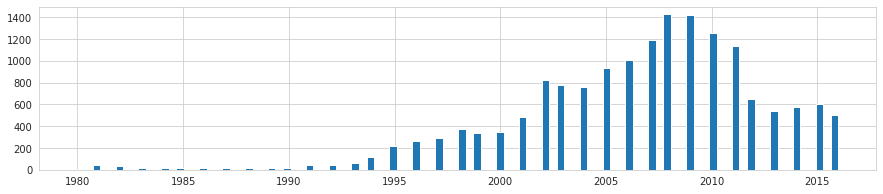

In [ ]:
df_filtered.release_year.hist(bins = 100, figsize = (15,3));

In [ ]:
print(len(df_filtered.query('release_year<1985')))

122


In [ ]:
df_filtered['release_year'].isnull().sum()

0

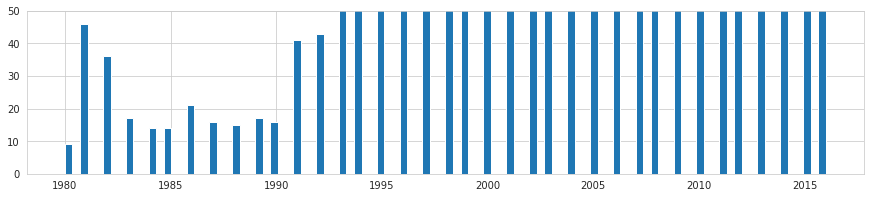

In [ ]:
df_filtered.release_year.hist(bins = 100, figsize = (15,3));
plt.ylim(0, 50);

Сначала могло показаться, что число игр вышедших **до 1990 года** в магазине **незначительно**, однако при детальном рассмотрении мы видим, что **их достаточно много**, но с целью сделать распредление более компактным и укоротить хвост я принимаю решение отрезать игры, которые были выпущены **до 1985** года.

In [ ]:
inds = (df_filtered['release_year']>1985) | (df_filtered['release_year'].isnull())
df_filtered = df_filtered.loc[inds, :]

Столбец **'na_sales'**:

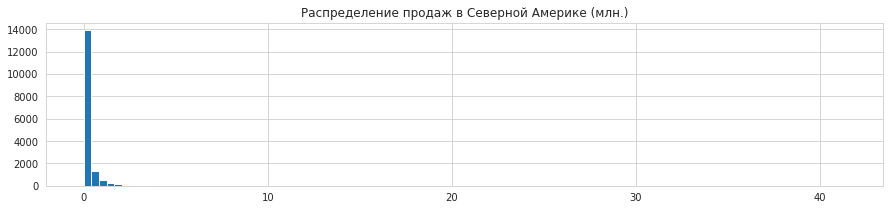

In [ ]:
df_filtered.na_sales.hist(bins = 100, figsize = (15,3));
plt.title('Распределение продаж в Северной Америке (млн.)');

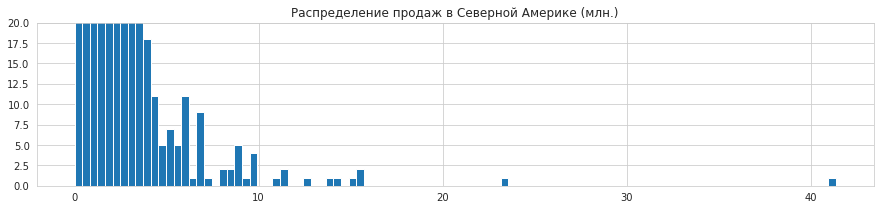

In [ ]:
df_filtered.na_sales.hist(bins = 100, figsize = (15,3));
plt.ylim(0, 20);
plt.title('Распределение продаж в Северной Америке (млн.)');

In [ ]:
print(len(df_filtered.query('na_sales>20')))

2


Тут мы сразу замечаем **4 суперхита**, которые явно выбиваются, уберём их.

In [ ]:
df_filtered = df_filtered.query('na_sales<20')

Столбец **'eu_sales'**:

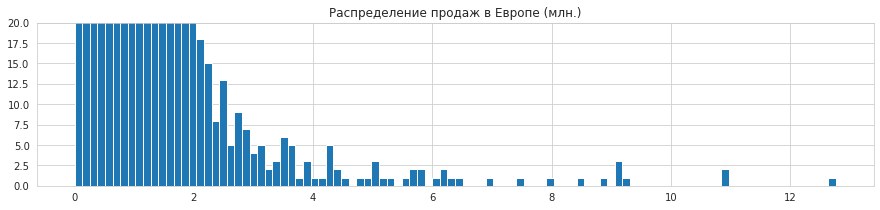

In [ ]:
df_filtered.eu_sales.hist(bins = 100, figsize = (15,3));
plt.ylim(0, 20);
plt.title('Распределение продаж в Европе (млн.)');

Снова небольшое количество хитовых игр, которые явно выбиваются из распределения, уберём.

In [ ]:
print(len(df_filtered.query('eu_sales>7')))

11


In [ ]:
df_filtered = df_filtered.query('eu_sales<7')

Столбец **'jp_sales'**:

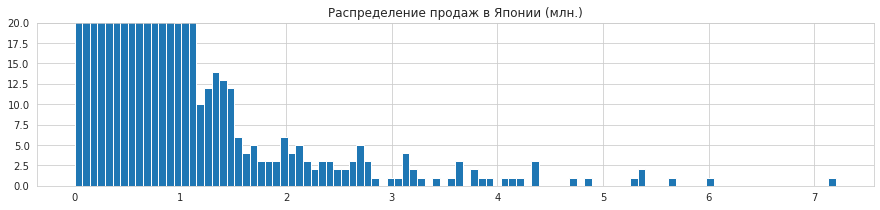

In [ ]:
df_filtered.jp_sales.hist(bins = 100, figsize = (15,3));
plt.ylim(0, 20);
plt.title('Распределение продаж в Японии (млн.)');

In [ ]:
print(len(df_filtered.query('jp_sales>4.5')))

8


In [ ]:
df_filtered = df_filtered.query('jp_sales<4.5')

Снова отрезаем небольшой хвостик.

столбец **'other_sales'**:

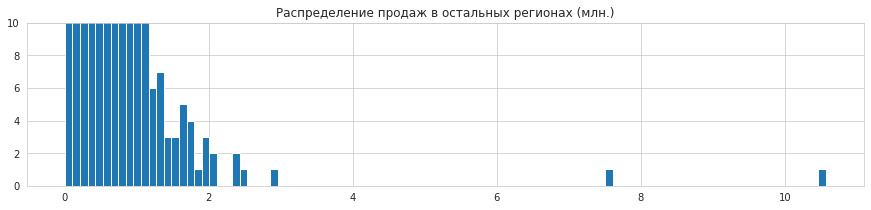

In [ ]:
df_filtered.other_sales.hist(bins = 100, figsize = (15,3));
plt.ylim(0, 10);
plt.title('Распределение продаж в остальных регионах (млн.)');

In [ ]:
print(len(df_filtered.query('other_sales>4')))

2


In [ ]:
df_filtered = df_filtered.query('other_sales<4')

Отрежем два дальних выброса.

столбец **'critic_score'**:

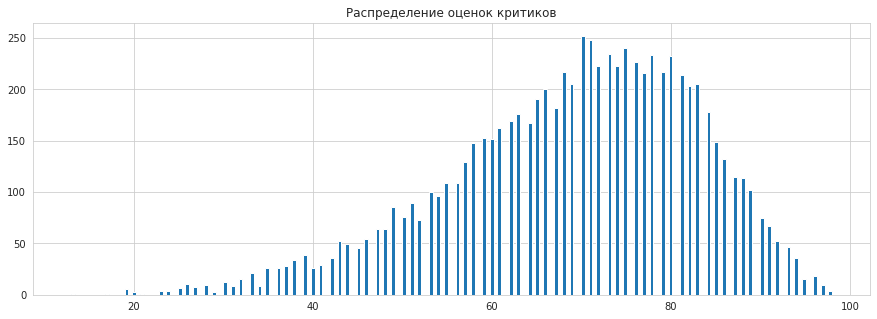

In [ ]:
df_filtered.critic_score.hist(bins = 200, figsize = (15,5));
plt.title('Распределение оценок критиков');

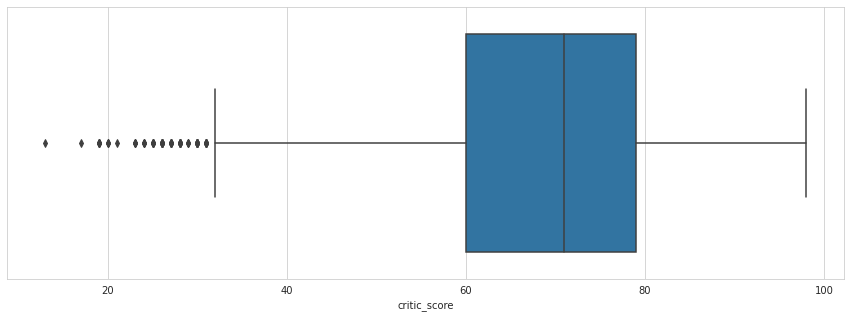

In [ ]:
sns.boxplot(data=df_filtered, x='critic_score');

Уберём **выбросы** с левой стороны.

In [ ]:
print(len(df_filtered.query('critic_score<30')))

59


In [ ]:
inds = (df_filtered['critic_score']>30) | (df_filtered['critic_score'].isnull())
df_filtered = df_filtered.loc[inds, :]

столбец **'user_score'**:

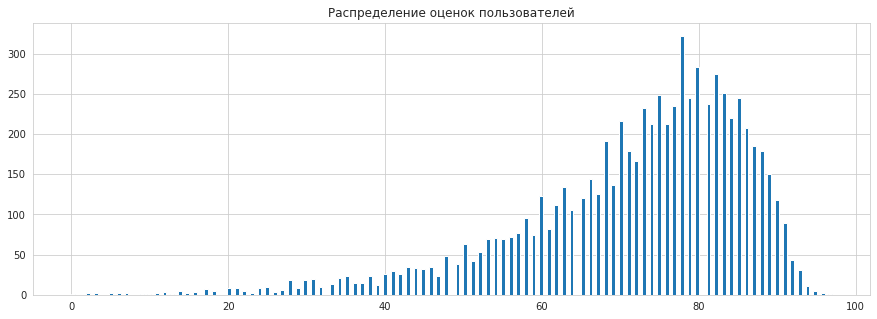

In [ ]:
df_filtered.user_score.hist(bins = 200, figsize = (15,5));
plt.title('Распределение оценок пользователей');

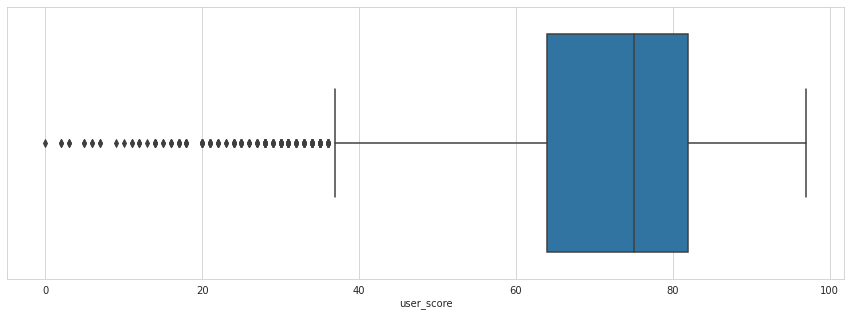

In [ ]:
sns.boxplot(data=df_filtered, x='user_score');

Отрежем выбросы слева

In [ ]:
print(len(df_filtered.query('user_score<25')))

74


In [ ]:
inds = (df_filtered['user_score']>25) | (df_filtered['user_score'].isnull())
df_filtered = df_filtered.loc[inds, :]

Проверяем **процент потерь**:

In [ ]:
loss_rate()

Потеряно 3.49 % данных.


Нам удалось "подровнять" данные, **потеряв всего 3.5%** строк.

## Добавим новый столбец:

Уверен, что нам понадобится **столбец с общим количеством проданных копий**. Добавим его

In [ ]:
df_filtered['total_sales'] = df_filtered['na_sales'] + df_filtered['eu_sales'] + df_filtered['jp_sales'] + df_filtered['other_sales'];

<ipython-input-534-53c51fed8e9c>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['total_sales'] = df_filtered['na_sales'] + df_filtered['eu_sales'] + df_filtered['jp_sales'] + df_filtered['other_sales'];


In [ ]:
df_filtered.sample(3)

,name,platform,release_year,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
4049,Crash of the Titans,DS,2007,Action,0.42,0.02,0.00,0.04,73.00,59.00,E,0.48
5351,MXRider,PS2,2001,Racing,0.16,0.13,0.00,0.04,69.00,68.00,E,0.33
5208,NHL 2K10,Wii,2009,Sports,0.32,0.01,0.00,0.03,79.00,68.00,E10+,0.36


# ИССЛЕДОВАТЕЛЬСКИЙ АНАЛИЗ:

In [ ]:
df_filtered.to_sql('df_filtered',con,index=False,if_exists='replace')

## Выпуск игр по годам:

In [ ]:
len(df_filtered)

16132

In [ ]:
sql = '''
SELECT t.release_year,
COUNT(t.name) as total_games,
SUM(t.total_sales) as total_sales
FROM df_filtered t
GROUP BY t.release_year
'''
years_pivot = select(sql)
years_pivot.head(5)


,release_year,total_games,total_sales
0,1986,21,37.08
1,1987,16,21.70
2,1988,14,47.18
3,1989,16,43.19
4,1990,16,49.37


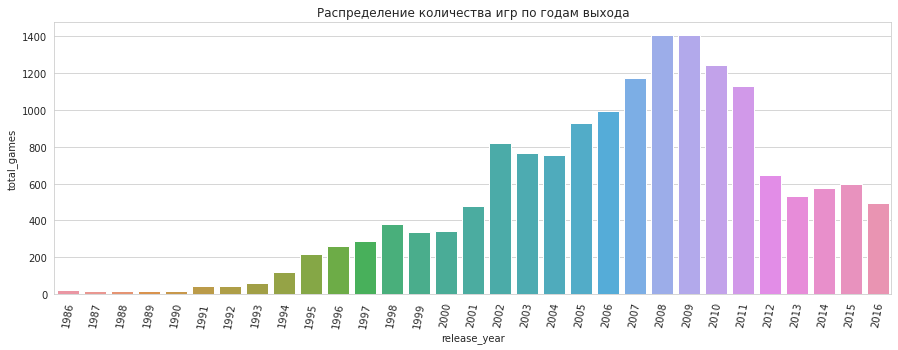

In [ ]:
sns.barplot(data=select(sql), x="release_year", y='total_games');
plt.title('Распределение количества выпускаемых игр по годам выхода');
plt.xticks(rotation=80);

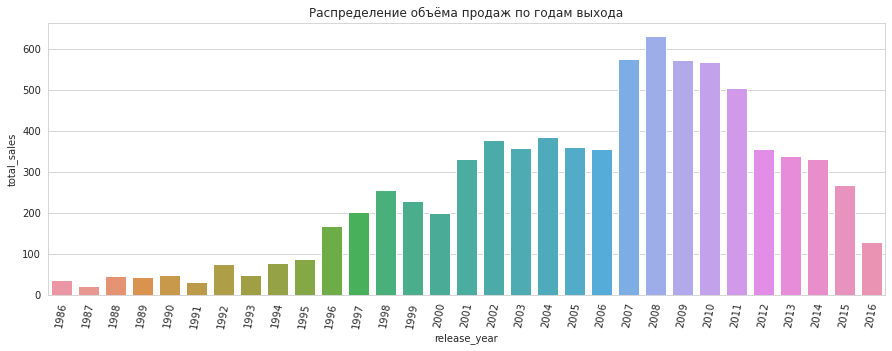

In [ ]:
sns.barplot(data=select(sql), x="release_year", y="total_sales");
plt.title('Распределение объёма продаж по годам выхода');
plt.xticks(rotation=80);

**ВЫВОД**:
* Распределение достаточно неравномерное, далеко не все года подойдут нам для построения выводов.
* **Бурный рост** количества продаваемых за год копий игр начался **с 1996** и **достиг пика** в период **с 2007 по 2011 год**
* Начиная с **2012 года** наблюдается **резкое падение**

## Изменение продаж по платформам:

In [ ]:
sql = '''
SELECT t.release_year, t.platform,
sum(t.total_sales) as total_sales,
COUNT(t.name) as total_games
FROM df_filtered t
WHERE t.release_year NOT NULL
GROUP BY t.release_year,
t.platform
ORDER BY t.release_year, sum(t.total_sales) desc
'''
platforms_by_years = select(sql)
platforms_by_years.head(10)

,release_year,platform,total_sales,total_games
0,1986,NES,36.41,19
1,1986,2600,0.67,2
2,1987,NES,19.76,10
3,1987,2600,1.94,6
4,1988,NES,45.01,11
5,1988,GB,1.43,1
6,1988,2600,0.74,2
7,1989,GB,34.71,9
8,1989,NES,7.85,5
9,1989,2600,0.63,2


In [ ]:
sql = '''
SELECT t.platform,
COUNT(t.name) as total_games,
SUM(t.total_sales) as total_sales
FROM df_filtered t
WHERE t.release_year NOT NULL
GROUP BY t.platform
ORDER BY SUM(t.total_sales) desc
'''
top_10_platforms = select(sql).head(10)
select(sql).head(5)


,platform,total_games,total_sales
0,PS2,2115,1199.56
1,X360,1212,957.66
2,PS3,1291,907.78
3,PS,1183,726.23
4,DS,2094,639.25


Исследуем **время жизни платформ** на примере **10 самых популярных** из них:

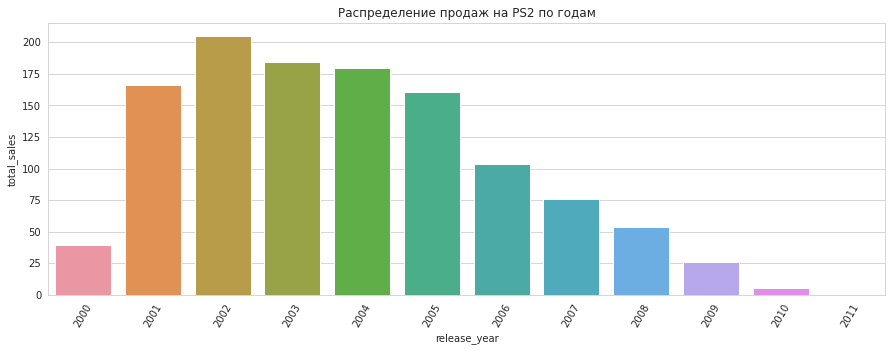

In [ ]:
sns.barplot(data=platforms_by_years.query("platform=='PS2'"), x="release_year", y="total_sales");
plt.title('Распределение продаж на PS2 по годам');
plt.xticks(rotation=60);

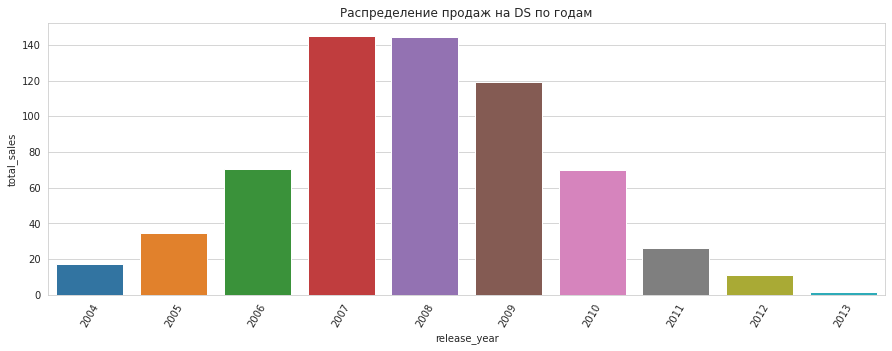

In [ ]:
sns.barplot(data=platforms_by_years.query("platform=='DS'"), x="release_year", y="total_sales");
plt.title('Распределение продаж на DS по годам');
plt.xticks(rotation=60);

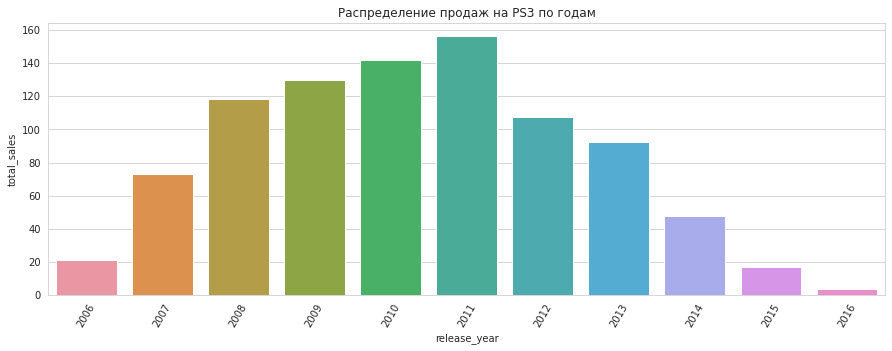

In [ ]:
sns.barplot(data=platforms_by_years.query("platform=='PS3'"), x="release_year", y="total_sales");
plt.title('Распределение продаж на PS3 по годам');
plt.xticks(rotation=60);

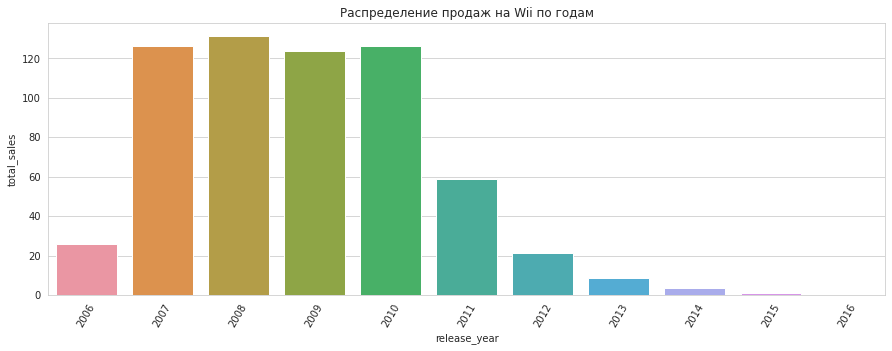

In [ ]:
sns.barplot(data=platforms_by_years.query("platform=='Wii'"), x="release_year", y="total_sales");
plt.title('Распределение продаж на Wii по годам');
plt.xticks(rotation=60);

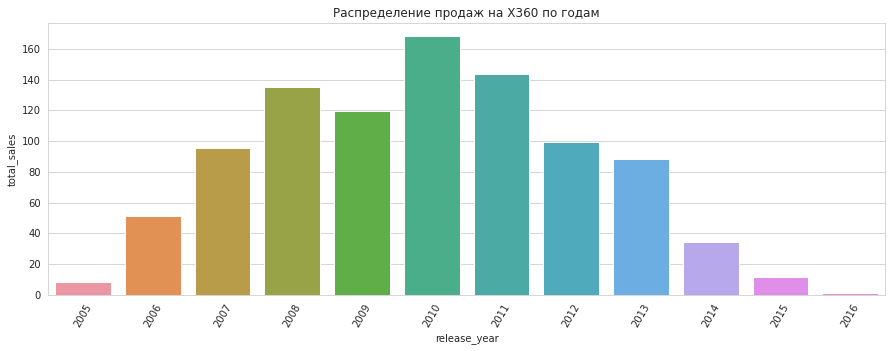

In [ ]:
sns.barplot(data=platforms_by_years.query("platform=='X360'"), x="release_year", y="total_sales");
plt.title('Распределение продаж на X360 по годам');
plt.xticks(rotation=60);

**Промежуточный вывод:** Визуализировав полученные данные мы видим, что зачастую **популярные игровые платформы** показывают **высокие значения продаж на промежутке 5-6 лет**, однако **изменения в объёме продаж** выглядят весьма **по-разному**. Какие-то платформы показывают **устойчивое плато**, другие **наращивают продажи и далее резко теряют позиции**, а третьи **равномерно набирают и далее постепенно ослабляют позиции** на рынке.

In [ ]:
plt.rcParams['figure.figsize'] = [15, 10]

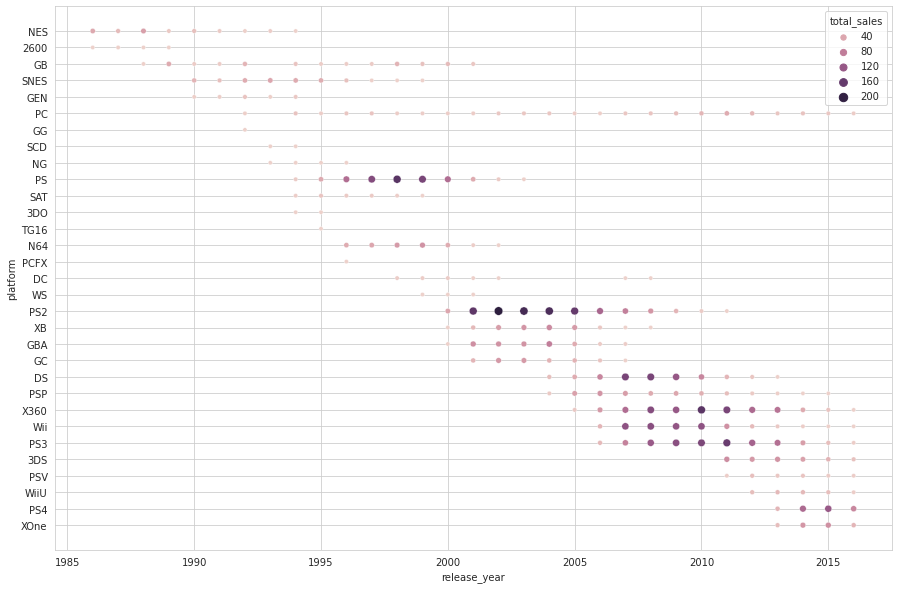

In [ ]:
sns.scatterplot(x='release_year', y='platform'
                ,hue='total_sales'
                ,size='total_sales'
                ,data=platforms_by_years);

Этот график хорошо демонстрирует нам **срок жизни платформ** и заодно показывает **примерный объём продаж**.

Мы уже можем заметить, что **объёмы продаж** игр в целом **увеличились после 1995** года, достигнув **наибольших объемов на отрезке 2005 - 2010** и далее началось **снижение**.

Думаю стоит взглянуть прицельнее на ту часть, где начинают появляться более жирные точки, то есть после 1995 года. Допольнительно исключим слишком маленькие объёмы продаж.

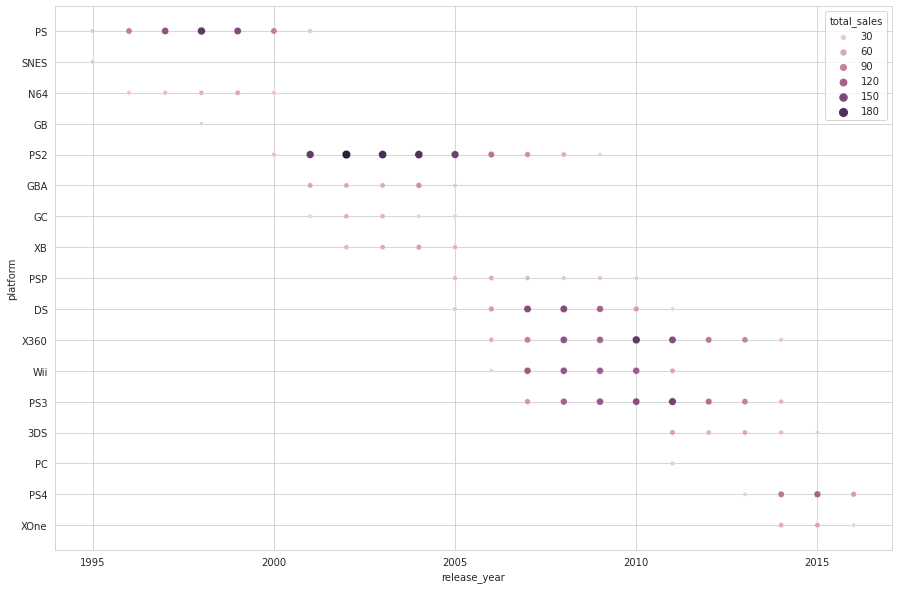

In [ ]:
sns.scatterplot(x='release_year', y='platform'
                ,hue='total_sales'
                ,size='total_sales'
                ,data=platforms_by_years.loc[(platforms_by_years['release_year']>=1995) & (platforms_by_years['total_sales']>= 25)]);

Чтобы сделать **окончательные выводы** я бы хотел провести **дополнительные расчёты**. Думаю нет смысла считать **среднее время жизни платформы** на основе всех имеющихся данных. Популярность каких-то из них оказалась слишком скоротечной.

In [ ]:
print(len(df_filtered['platform'].unique()))

31


Всего у нас **31 игровая платформа**.

Я думаю было бы разумно посчитать среднее время жизни основываясь на **10 самых популярных** из них, но **исключить** из этого списка **'PC'**, т.к. это слишком зонтичный термин, который не подразумевает под собой смену поколений как например линейки консолей **Xbox** или **PlayStation**. Очевидно "срок жизни" **PC** слишком велик и **исказит наши итоговые цифры**.

[После исправления **PC** как раз **сместился** на **11ю строчку**]

In [ ]:
df_filtered.to_sql('df_filtered',con,index=False,if_exists='replace')
platforms_by_years.to_sql('platforms_by_years',con,index=False,if_exists='replace')

In [ ]:
top_10_platforms['platform'].unique()

array(['PS2', 'X360', 'PS3', 'PS', 'DS', 'Wii', 'PS4', 'GBA', 'PSP',
       '3DS'], dtype=object)

Я буду считать платформу **"живой"**, если на неё **продаётся больше 20 мллионов копий игр в год**:

In [ ]:
sql = '''
SELECT t.platform,
COUNT(distinct t.release_year) as platform_lifespan
FROM platforms_by_years t
WHERE t.platform IN ('PS2', 'X360', 'PS3', 'PS', 'DS', 'Wii', 'PS4', 'GBA', 'PSP', '3DS')
AND t.total_sales > 20
GROUP BY t.platform
'''
select(sql)

,platform,platform_lifespan
0,3DS,5
1,DS,7
2,GBA,5
3,PS,7
4,PS2,10
5,PS3,9
6,PS4,4
7,PSP,6
8,Wii,7
9,X360,9


Думаю сейчас у нас получатся достаточно **хорошие рассчеты**. Мы не рассматриваем **слишком нишевые и непопулярные платформы**, не учитываем **"остаточные" годы жизни устаревших платформ**, когда продажи уже совсем низки и не искажаем данные аномальным долгожительством **PC**

In [ ]:
select(sql)['platform_lifespan'].describe()

count   10.00
mean     6.90
std      1.97
min      4.00
25%      5.25
50%      7.00
75%      8.50
max     10.00
Name: platform_lifespan, dtype: float64

Получается , что **на момент 2016го** года цифры корректны, но мы как люди из будущего понимаем, что до выхода консолей нового поколения ещё 4-5 лет и **срок жизни консолей 4го поколения по итогу оказался дольше**.

**Вывод:**


*   **В среднем** популяная игровая платформа занимает заметную нишу игрового рынка **7 лет**
*   **Динамика изменения объёма продаж** у разных популярных игровых платформ в течении их "срока жизни" **сильно отличается**
*  Только на промежутке примерно **после 2007го года** **гегемония PlayStation** актуального поколения **сменяется конкуренцией** на равных между несколькими производителями платформ.
* В последние годы на рынке лидируют платформы **PS4** и **XOne**



## Выбираем актуальный период:

На основании проведенного ранее исследовательского анализа я думаю, что **наиболее актуальным для построения прогнозов периодом являются последние годы, начиная с 2013го**:

*   **С 2013го по 2016й год** на рынке лидирует **одинаковый набор платформ** (PC, PS4, XOne, WiiU, PSV ...)
*   Этот отрезок **включает в себя годы снижения общих объемов продаж** игр, включение в исследуемый период пиковых годов могло бы исказить эту явную тенденцию.
*   Игровая индустрия не стоит на месте в техническом плане и большинство**игр в рамках данного периода будут обладать соизмеримым уровнем** технической исполнения, бюджетом и т.д.



##Лидерство, рост и падение платформ:

Построим **график изменения общего объема** продаж **на различных платформах** с 2013го по 2016й год

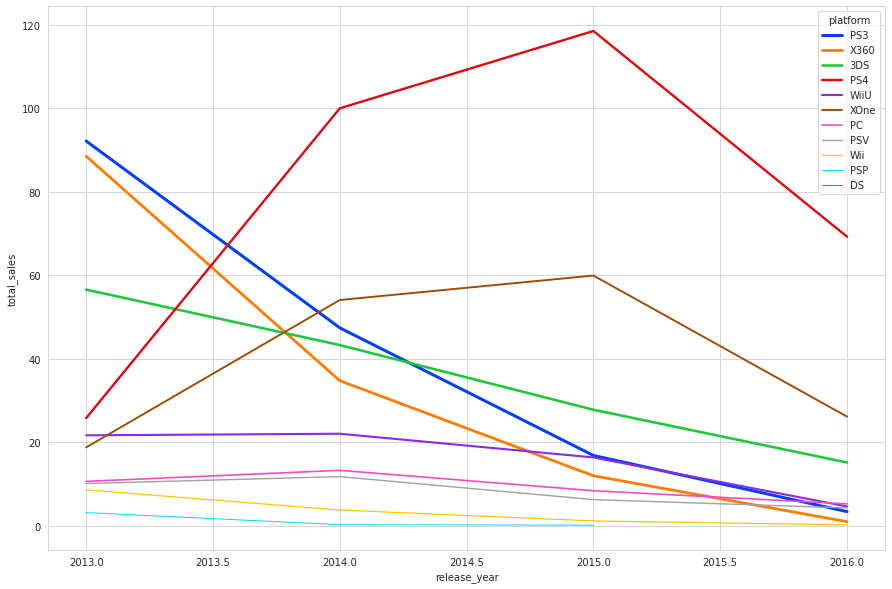

In [ ]:
sns.lineplot(y='total_sales', x='release_year', hue='platform', size = 'platform'
                     ,data = platforms_by_years.query('release_year>2012'),
                     palette = ('bright'));
                     plt.title('Распределение продаж по платформам 2013 - 2016');


**ВЫВОД:**

*   **Платформ**, которые к отчётному периоду **наращивают объём** продаж **нет** 
*   Такие **платформы** как PSP, DS, Wii, X360, PS3, WiiU, PC Полностью или практически полностью **утратили актуальность**.
* **PS4, XOne, 3DS** имеют **наиболее высокие объёмы продаж**, хотя они и снижаются в соответствии с общим трендом.



## Влияние отзывов пользователей и критиков на продажи на примере одной платформы:

Выбирать вслепую не хочется, так что мы выберем **одну из трёх наиболее актуальных** на момент 2016го года **платформ** **с наибольшим числом оцененых критиками и пользователями** **игр**:

In [ ]:
sql = '''
SELECT t.platform,
COUNT(t.name) as total_games,
COUNT(t.critic_score) as total_critic_score,
COUNT(t.user_score) as total_user_score
FROM df_filtered t
WHERE t.platform IN ('PS4', 'XOne', '3DS')
GROUP BY t.platform
ORDER BY COUNT(t.name) desc
'''
select(sql).head(10)

,platform,total_games,total_critic_score,total_user_score
0,3DS,510,165,169
1,PS4,386,246,251
2,XOne,243,166,178


Возьмём для исследования платформу **PS4**



Для начала сделаем таблицу, где сотанутся только нужные строки:

In [ ]:
sql = '''
SELECT t.* 
FROM df_filtered t
WHERE t.platform = 'PS4'
AND t.critic_score NOT NULL
AND t.user_score NOT NULL
AND t.user_score > 0
'''
select(sql).head(3)

,name,platform,release_year,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Grand Theft Auto V,PS4,2014,Action,3.96,6.31,0.38,1.97,97.00,83.00,M,12.62
1,FIFA 16,PS4,2015,Sports,1.12,6.12,0.06,1.28,82.00,43.00,E,8.58
2,Call of Duty: Advanced Warfare,PS4,2014,Shooter,2.81,3.48,0.14,1.23,83.00,57.00,M,7.66


In [ ]:
len(select(sql))

243

*Хотел оставить только те игры, которых продано более одного миллиона копий, но тогда их остаётся совсем мало.*

Взглянем на **оценки критиков**:

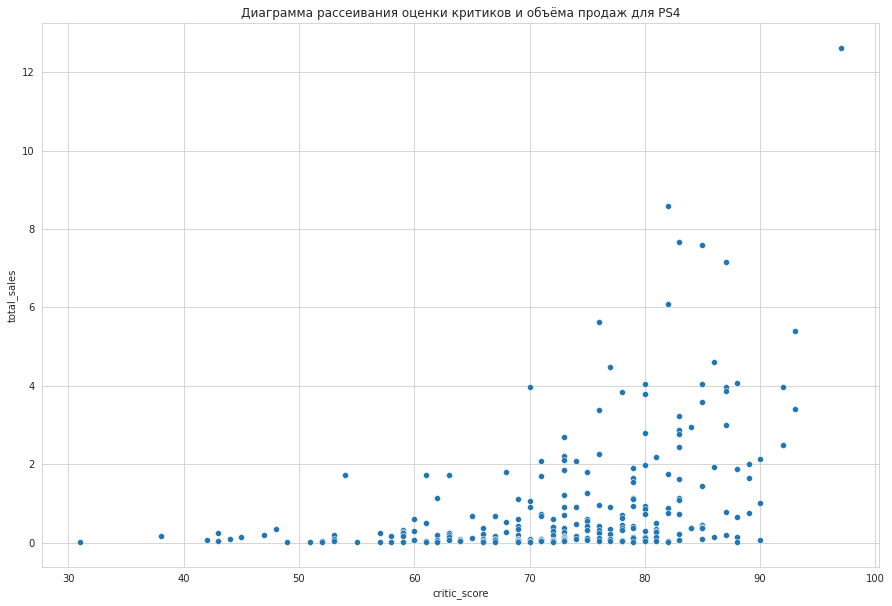

In [ ]:
sns.scatterplot(data=select(sql), x='critic_score', y='total_sales');
plt.title('Диаграмма рассеивания оценки критиков и объёма продаж для PS4');

In [ ]:
select(sql)['total_sales'].corr(select(sql)['critic_score'])

0.4201600004616749

**Коэфицент корреляции Пиросна 0.42** - есть **прямая взаимосвязь**, однако она не очень сильная.

Теперь посмотрим на **оценки пользователей**:

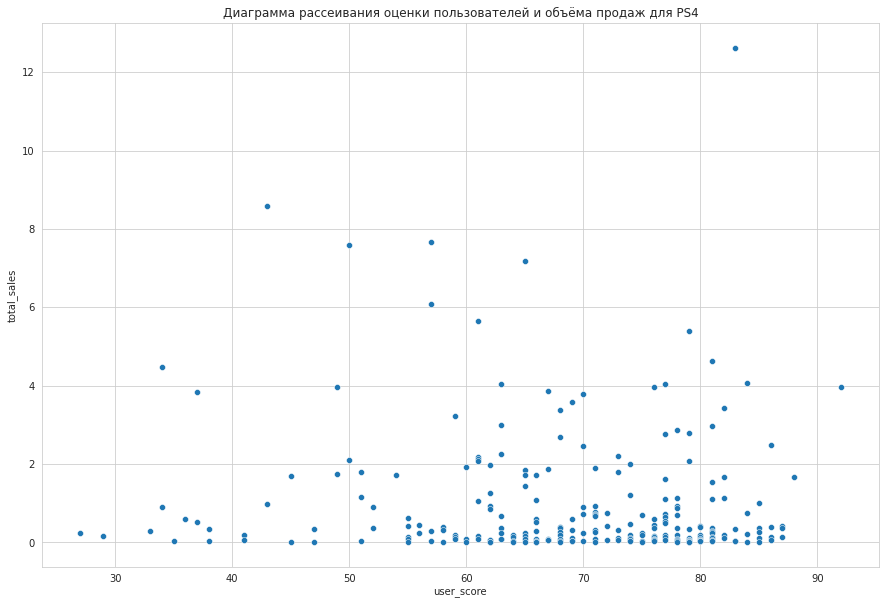

In [ ]:
sns.scatterplot(data=select(sql), x='user_score', y='total_sales');
plt.title('Диаграмма рассеивания оценки пользователей и объёма продаж для PS4');

In [ ]:
select(sql)['total_sales'].corr(select(sql)['user_score'])

-0.08680021893863027

**Коэфицент -0.08** , практически нулевой, взаимосвязь отсутсвует...

Ради интереса посмотрим на цифры по всем **трём наиболее актуальным платформам**:

In [ ]:
xone = '''
SELECT t.* 
FROM df_filtered t
WHERE t.platform = 'XOne'
AND t.critic_score NOT NULL
AND t.user_score NOT NULL
AND t.user_score > 0
'''

In [ ]:
len(select(xone))

162

In [ ]:
select(xone)['total_sales'].corr(select(xone)['critic_score'])

0.42656659909902395

In [ ]:
select(xone)['total_sales'].corr(select(xone)['user_score'])

-0.13866695977784071

In [ ]:
ds = '''
SELECT t.* 
FROM df_filtered t
WHERE t.platform = '3DS'
AND t.critic_score NOT NULL
AND t.user_score NOT NULL
AND t.user_score > 0
'''

In [ ]:
len(select(ds))

155

In [ ]:
select(ds)['total_sales'].corr(select(ds)['critic_score'])

0.34244461099407225

In [ ]:
select(ds)['total_sales'].corr(select(ds)['user_score'])

0.23134500152783707

Кажется всё верно, на **большем количестве данных ситуация почти не меняется**.

**Вывод:**

*   На примере **PS4** мы выяснили, что **оценки критиков** связаны с **количеством проданных копий**, но эта прямая **взаимосвязь не очень сильная**. **Коэфицент Пиросна = 0.42**
*   А вот **оценки юзеров** показали очень **близкий к нулю уровень взаимосвязи**, кажется они совсем не связаны с объёмом продаж игр. Вот так-то , геймеры.... **Коэфицент Пиросна = -0.08**
* Проверка на данных по **трём актуальным платформам** подтверждает наши выводы



##Исследование жанров:

Нам предстоит исследовать на выбранном временном отрезке **динамику продаж по жанрам** :

In [ ]:
sql = '''
SELECT t.release_year, t.genre,
sum(t.total_sales) as total_sales,
COUNT(t.name) as total_games
FROM df_filtered t
GROUP BY t.release_year,
t.genre
ORDER BY t.release_year, sum(t.total_sales) desc
'''
select(sql)
select(sql).sample(5)

,release_year,genre,total_sales,total_games
64,1993,None,2.42,0
56,1992,Strategy,0.37,3
313,2014,Role-Playing,45.60,88
118,1997,Adventure,4.97,14
140,1999,Simulation,11.46,20


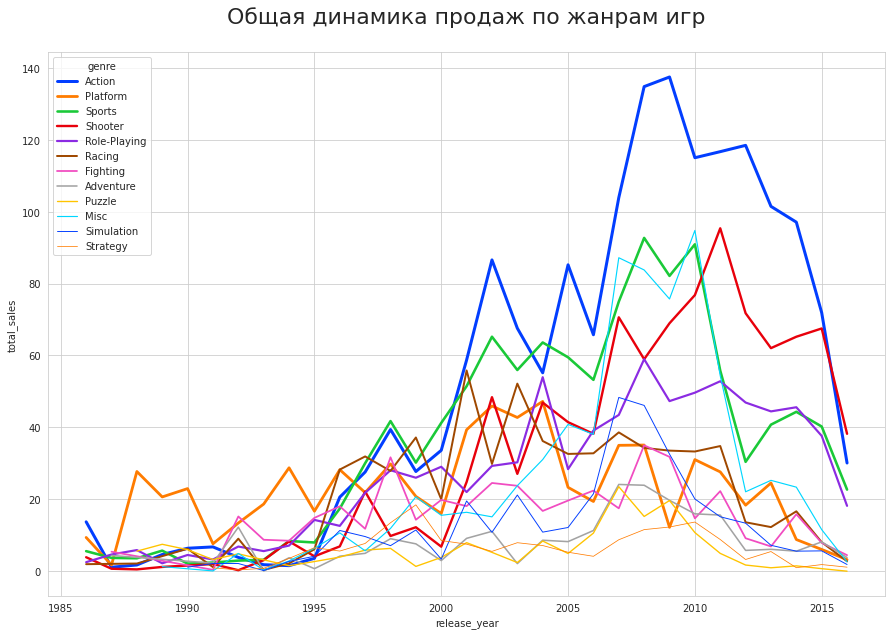

In [ ]:
sns.lineplot(y='total_sales', x='release_year', hue='genre', size = 'genre'
                     ,data=select(sql),
                     palette = ('bright'));
                    
plt.title('Общая динамика продаж по жанрам игр' + '\n', fontsize = 22);

**График** выглядит несколько **перегруженным** и мы обязательно взглянем на более **очищенную версию** далее, но тут мы хорошо видим ряд как уже известных нам, так и новых интересных **тенденций**:

* На более актуальном для нас отрезке **4 жанра** явно выделились в **группу лидирующих** с ощутимым отрывом
*   Общий **рост и спад** продаж 
*   Не все жанры **растут и падают** в продажах **равномерно**
* Продажи некоторых **жанров** практически **сошли на нет**



Сохраним датафрейм с интересующей нас информацией - **период с 2013 по 2016 год** и **жанры составляющие не менее 3%** от продаж:

In [ ]:
sql = '''
SELECT t.release_year, t.genre,
sum(t.total_sales) as total_sales,
COUNT(t.name) as total_games
FROM df_filtered t
WHERE t.release_year > 2012
GROUP BY t.release_year,
t.genre
ORDER BY t.release_year, sum(t.total_sales) desc
'''
genres_actual = select(sql)

In [ ]:
genres_actual.to_sql('genres_actual',con,index=False,if_exists='replace')

Посмотрим что происходило с жанрами в **последние два года**:

In [ ]:
sql = '''
SELECT t.*
FROM genres_actual t
WHERE t.release_year == 2015
AND t.total_sales > 7
'''


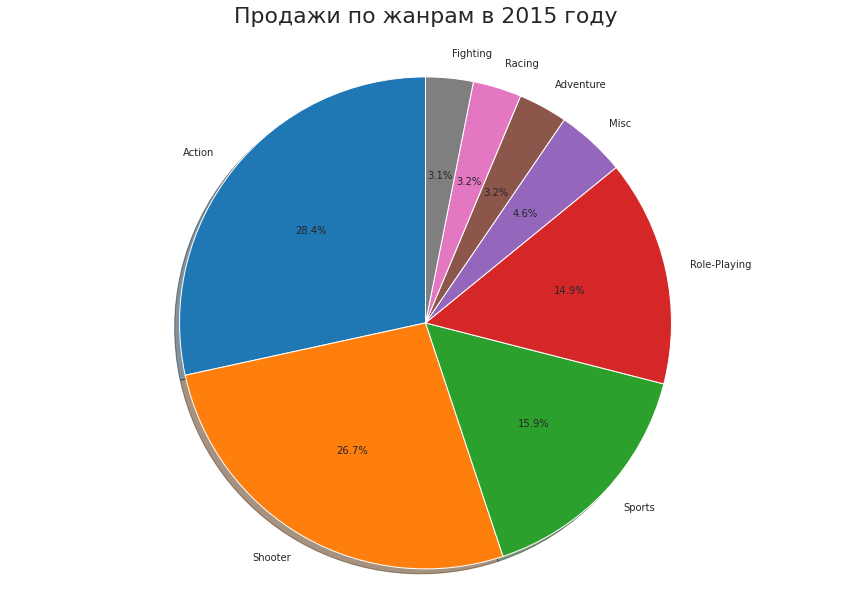

In [ ]:
labels = select(sql)['genre']
sizes = select(sql)['total_sales']

fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  
plt.title('Продажи по жанрам в 2015 году' + '\n', fontsize = 22);
plt.show()

In [ ]:
sql = '''
SELECT t.genre,
t.total_sales,
FROM df_filtered t
WHERE total_sales > 7
GROUP BY t.genre
ORDER BY t.total_sales desc
'''

In [ ]:
sql = '''
SELECT t.*
FROM genres_actual t
WHERE t.release_year == 2016
AND t.total_sales > 3.5
'''

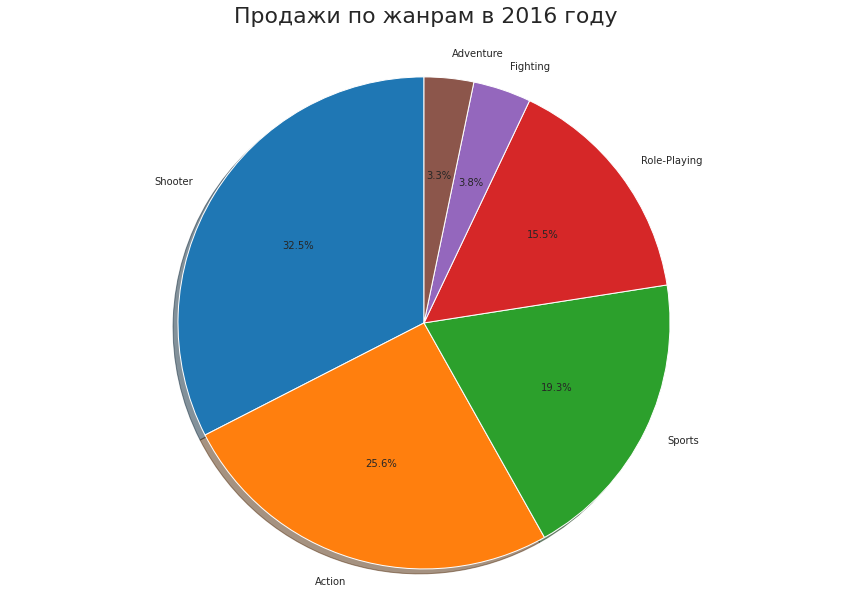

In [ ]:
labels = select(sql)['genre']
sizes = select(sql)['total_sales']

fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  
plt.title('Продажи по жанрам в 2016 году' + '\n', fontsize = 22);
plt.show()

Промежуточный **вывод**:
* В последние годы **4 лидирующих жанра** занимают примерно **85-90% всего рынка**
* **В 2016** году доля **шутеров и спортивных игр заметно увеличилась**, а доля **экшенов и РПГ** немного **снизилась**.
* Среди **"малых жанров"** **увеличилась** доля **файтингов и адвенчур**, а вот категория **"разное" и гонки** ушли **ниже отметки в 3%**.

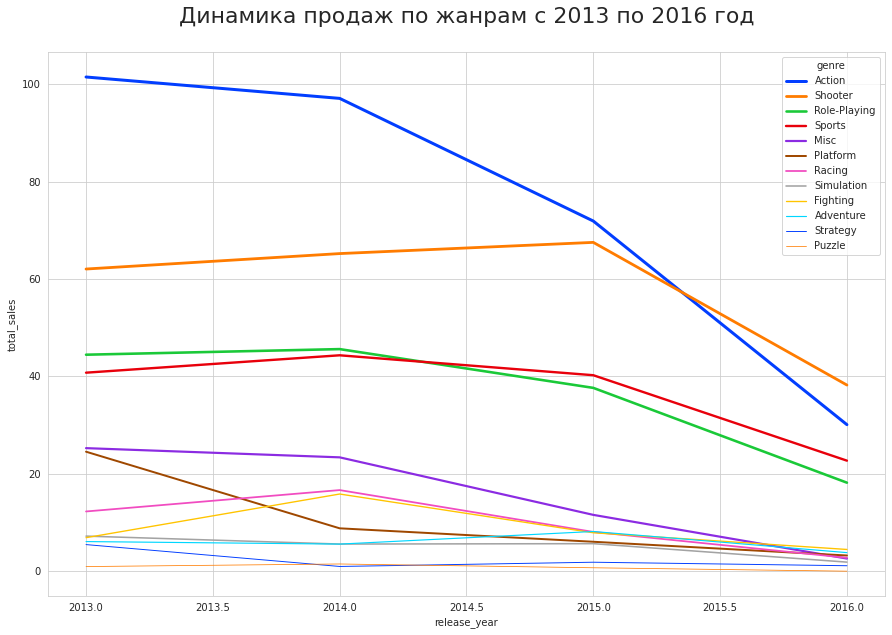

In [ ]:
sns.lineplot(y='total_sales', x='release_year', hue='genre', size = 'genre'
                     ,data=genres_actual,
                     palette = ('bright'));

plt.title('Динамика продаж по жанрам с 2013 по 2016 год' + '\n', fontsize = 22);

Посмотрим ещё график **большего масштаба** чтобы "распутать клубок" наших **жанров-аутсайдеров** в нижней части графика:

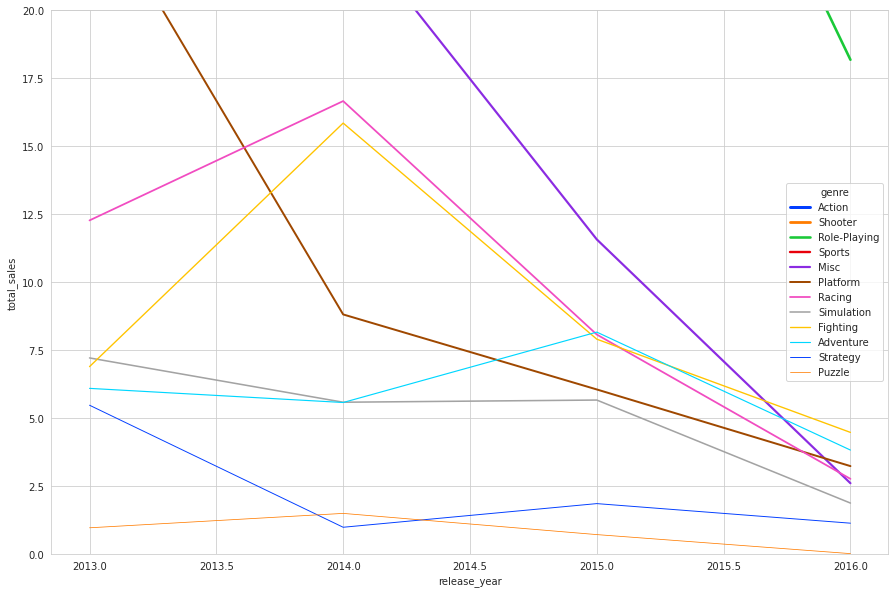

In [ ]:
sns.lineplot(y='total_sales', x='release_year', hue='genre', size = 'genre'
                     ,data=genres_actual,
                     palette = ('bright'));
plt.ylim(0, 20);

Посмотрим на медианные продажи по жанрам:

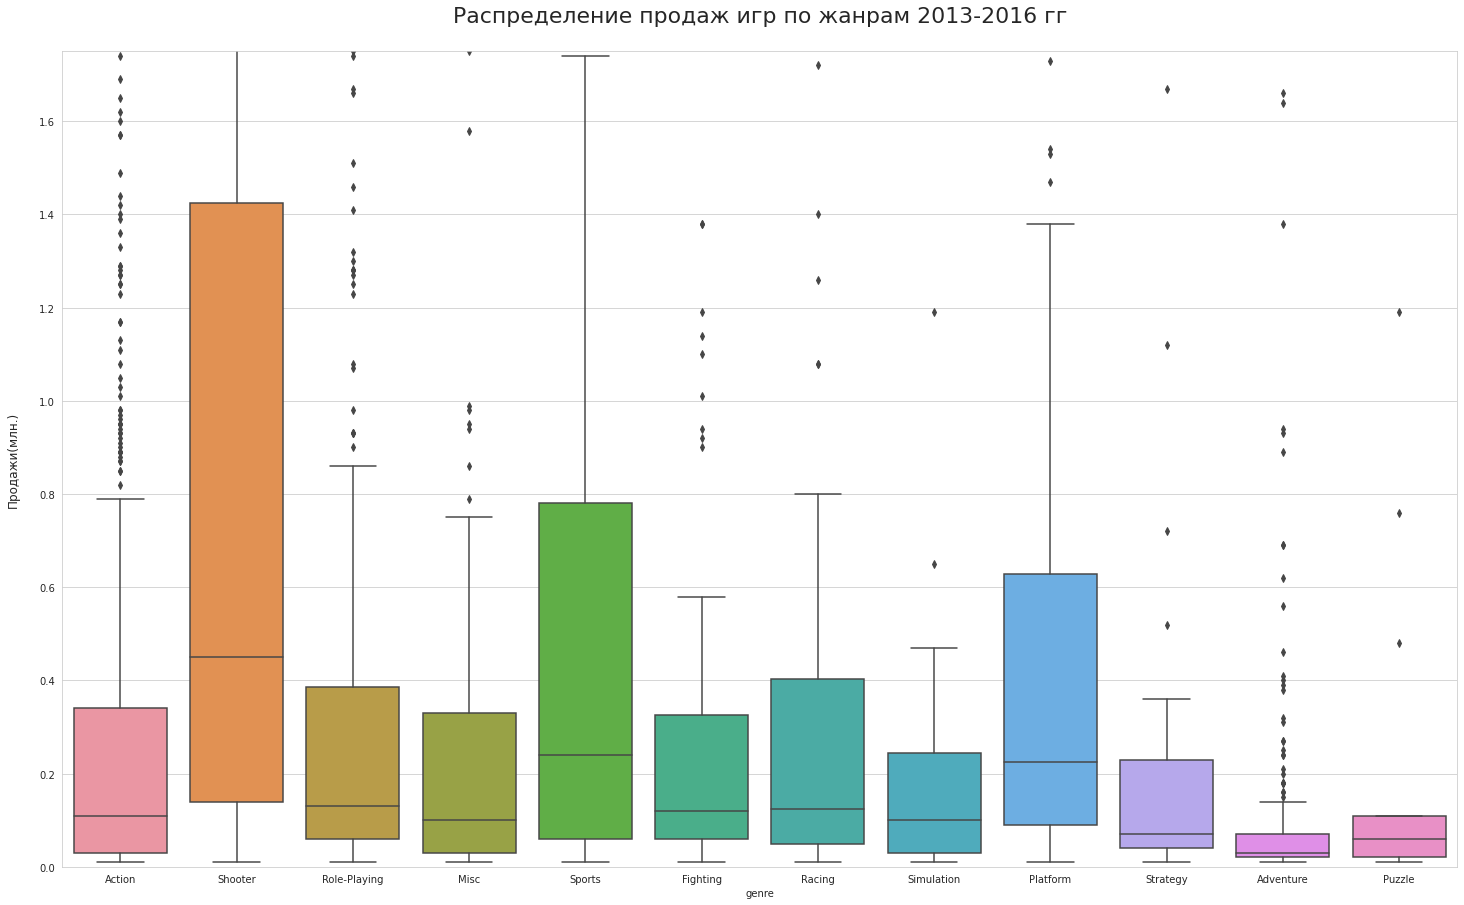

In [ ]:
plt.figure(figsize = (25, 15))
plt.title('Распределение продаж игр по жанрам 2013-2016 гг' + '\n', fontsize = 22)
ax = sns.boxplot(x = 'genre', y = 'total_sales', data = df_filtered.query('release_year>2012'))
ax.set_ylim([0, 1.75])
plt.ylabel('Продажи(млн.)' + '\n',fontsize=12)
plt.show()

Картина получается крайне любопытная
* наибольшие медианные продажи у жанра **Shooter**, а вот у жанра **Action** они намного ниже (даже ниже, чем у многих значительно менее в абсолютных значениях популярных жанров), это скорее всего означает, что в жанре Экшн выходит много хитовых популярных игр, но спрос на средний шутер выше.
* Такие жанры как **Sports** и **Platform** обладают достаточно высокими медианными продажами, тогда как многие другие жанры видимо больше полагаются на хитовые серии игр.

**Выводы:**
* В последние годы **жанры разделились** на две группы - **лидирующие** (Action, Shooter, Role-play и Sports) и **отстающие** (Misc, Platform, Racing, Simulation, Fighting, Adventure, Strategy, Puzzle и пр.)
* **В 2015** году **Шутеры** впервые **обошли** лидирующие с начала 21го века **игры в жанре Экшн**.
* **Продаж** игр в жанре Паззл **практически не было** за последние 2 года
* Игры в нескольких **жанрах-аутсайдерах** (Стратегии, Приключенческие, Файтинги, Симуляторы) **продавались достаточно стабильно** и даже **показывали** на некоторых участках графика **рост при общем падении продаж** игр.
* В последние несколько лет около **85-90% рынка** заняли **четыре лидирующих жанра** - Action, Shooter, Role-play и Sports, их **доля менялась не сильно**.
* **Медианные продажи** демонстрируют интересную картину - среди лидеров (Action и Shooter) очень **значительная разница**. Очевидно спрос на средний шутер больше, но в среднем хитовых Экшенов больше.
* Некоторые "малые жанры" имеют достаточно **высокую медиану продаж**.

## Боксплоты:

Сейчас мы будем изучать боксплоты глобальных продаж игр по платформам за актуальный период:

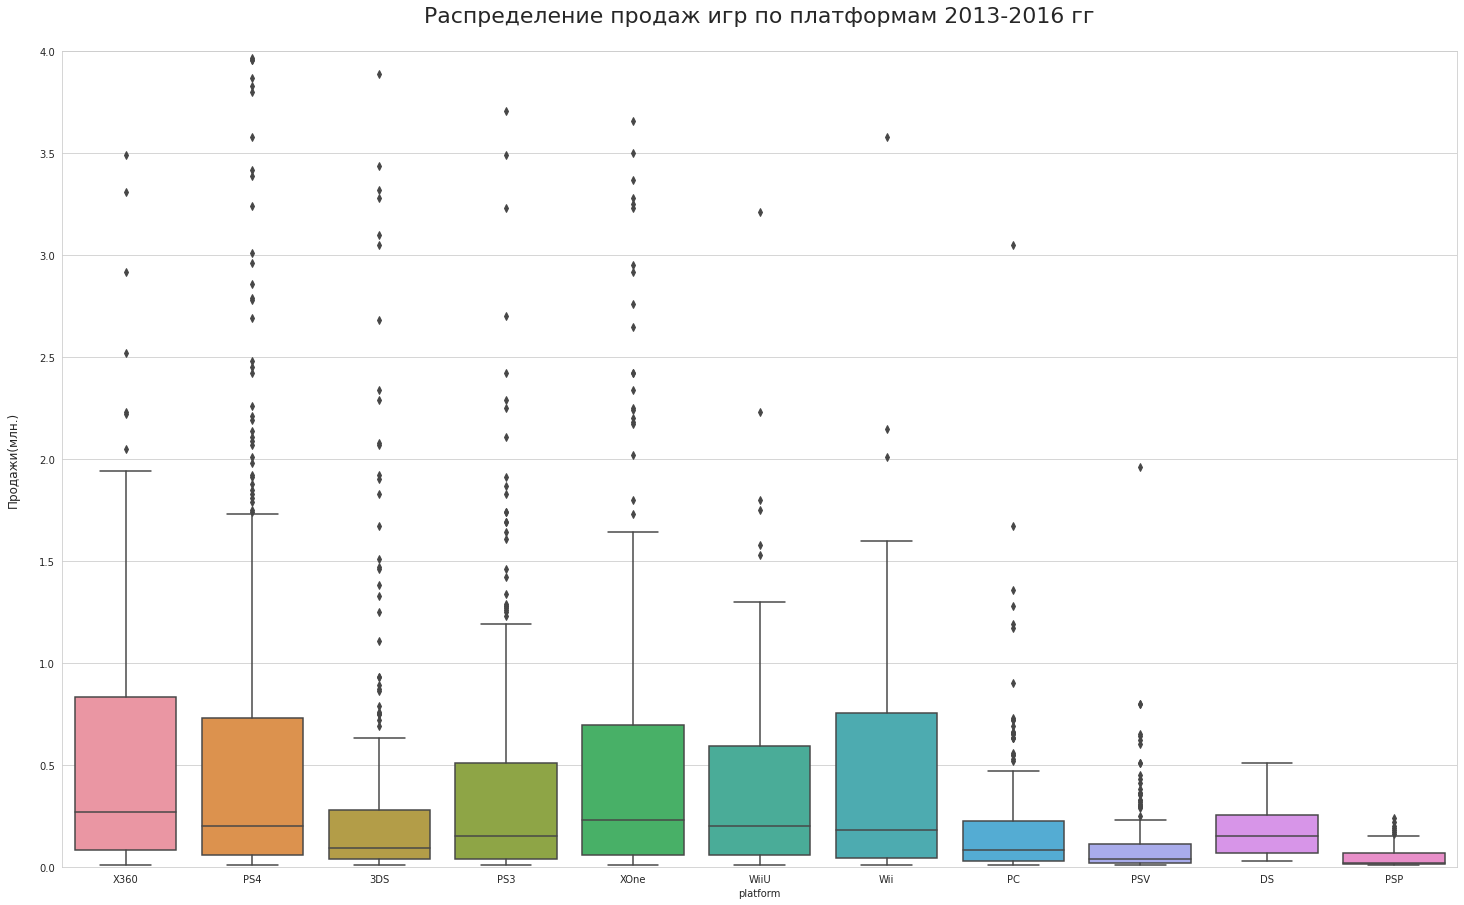

In [ ]:
plt.figure(figsize = (25, 15))
plt.title('Распределение продаж игр по платформам 2013-2016 гг' + '\n', fontsize = 22)
ax = sns.boxplot(x = 'platform', y = 'total_sales', data = df_filtered.query('release_year>2012'))
ax.set_ylim([0, 4])
plt.ylabel('Продажи(млн.)' + '\n',fontsize=12)
plt.show()

**Выводы:**
* Наибольший **межквартильный размах** у платформ X360, PS4, PS3, XOne,WiiU и Wii
* В данном случае мы видим выбросы только в большую сторону, это означает **хитовые игры с аномально большими тиражами** (по меркам платформы разумеется)
* **Наибольшие медианные продажи** за актуальный период у платформы **X360**
*  **Наименьшие медианные продажи** за актуальный период у платформы **PSP**
* Кажется у **PS4** больше всего **хитовых игр** с большими тиражами.
* **Nintendo DS** выделяется отсутствием выбросов. Это означает, что редко выходят хиты, однако цифры продаж разных игр довольно ровные.

#ПОРТРЕТ ПОЛЬЗОВАТЕЛЯ:

In [ ]:
df_filtered.to_sql('df_filtered',con,index=False,if_exists='replace')

Нам необхоимо составить усреднённый портрет пользователя из разных регионов мира

##Северная Америка (NA):

 Начнём с пользователей из **Северной Америки**:

In [ ]:
sql = '''
SELECT SUM(na_sales) as total_na_sales,
t.platform, t.release_year
FROM df_filtered t
WHERE t.na_sales NOT NULL
AND t.release_year > 2013
GROUP BY t.platform
ORDER BY SUM(na_sales) desc
LIMIT 5
'''

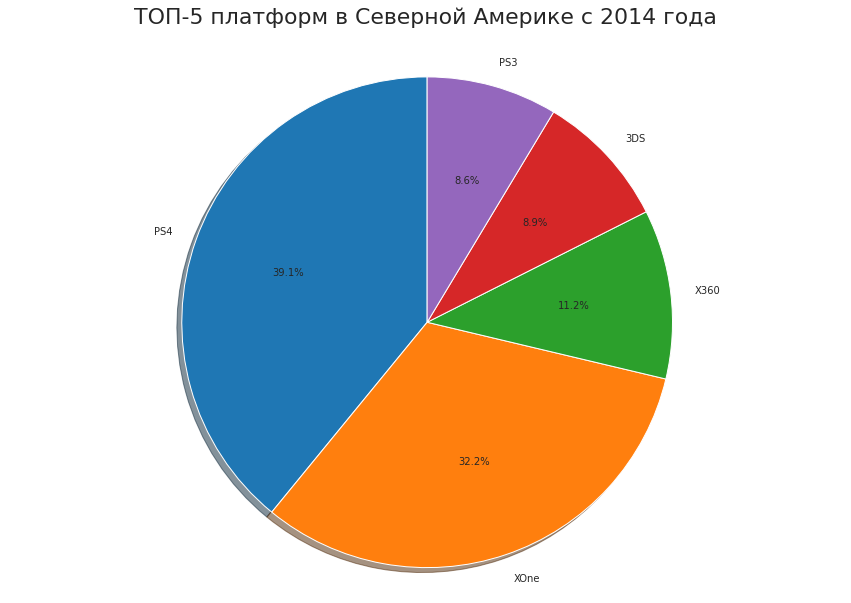

In [ ]:
labels = select(sql)['platform']
sizes = select(sql)['total_na_sales']

fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  
plt.title('ТОП-5 платформ в Северной Америке с 2014 года' + '\n', fontsize = 22);
plt.show()

In [ ]:
sql = '''
SELECT SUM(na_sales) as total_na_sales,
t.genre, t.release_year
FROM df_filtered t
WHERE t.na_sales NOT NULL
AND t.release_year > 2013
GROUP BY t.genre
ORDER BY SUM(na_sales) desc
LIMIT 5
'''

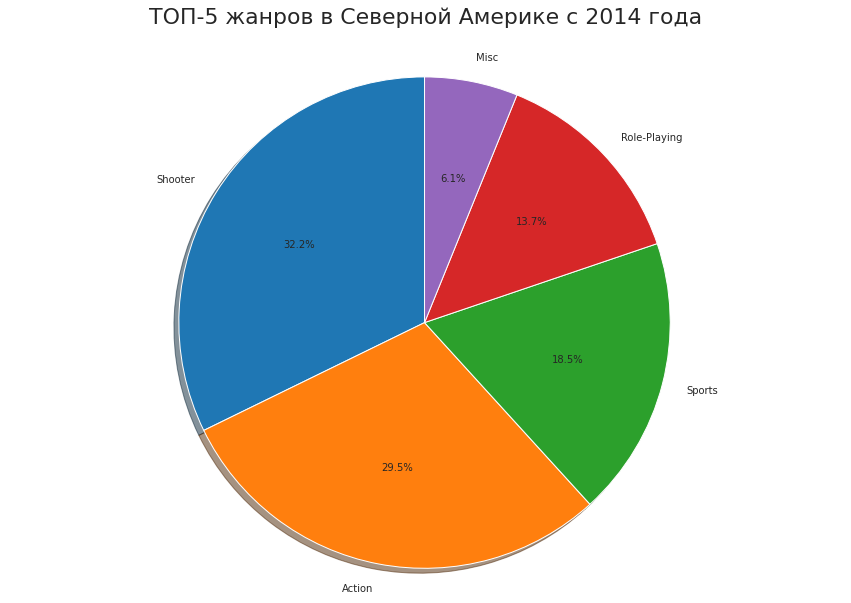

In [ ]:
labels = select(sql)['genre']
sizes = select(sql)['total_na_sales']

fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  
plt.title('ТОП-5 жанров в Северной Америке с 2014 года' + '\n', fontsize = 22);
plt.show()

In [ ]:
sql = '''
SELECT SUM(na_sales) as total_na_sales,
t.rating, t.release_year
FROM df_filtered t
WHERE t.na_sales NOT NULL
AND t.release_year > 2013
GROUP BY t.rating
ORDER BY SUM(na_sales) desc
'''

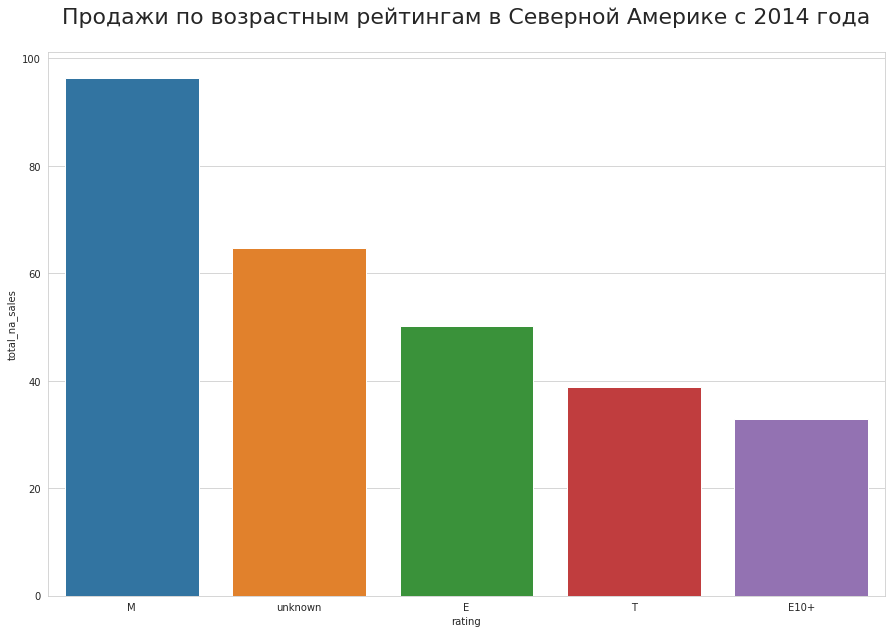

In [ ]:
sns.barplot(data=select(sql), x='rating', y='total_na_sales');
plt.title('Продажи по возрастным рейтингам в Северной Америке с 2014 года' + '\n', fontsize = 22);

**Промежуточный вывод:**
* Усредненный **северо-американский геймер** последних нескольких лет - это **совершеннолетни**й человек, который скорее всего **играет в Шутеры или Экшены** на платформе **PS4 или XOne**
* **Топ-5 жанров**: Шутер, Экшн, Спортивные, РПГ и Разное.
* **Топ-5 платформ**: PS4, XOne, X360, 3DS, PS3
* **Большую часть в продажах занимают игры с рейтингом M** (для взрослых), на втором месте рейтинг **E** (для всех), на третьем **T** (для подростков), четвертое занимают игры с рейтингом **E10+** (для всех геймеров старше 10) 

##Европа (EU):

Теперь обратимся к **европейским геймерам**:

In [ ]:
sql = '''
SELECT SUM(eu_sales) as total_eu_sales,
t.platform, t.release_year
FROM df_filtered t
WHERE t.eu_sales NOT NULL
AND t.release_year > 2013
GROUP BY t.platform
ORDER BY SUM(eu_sales) desc
LIMIT 5
'''

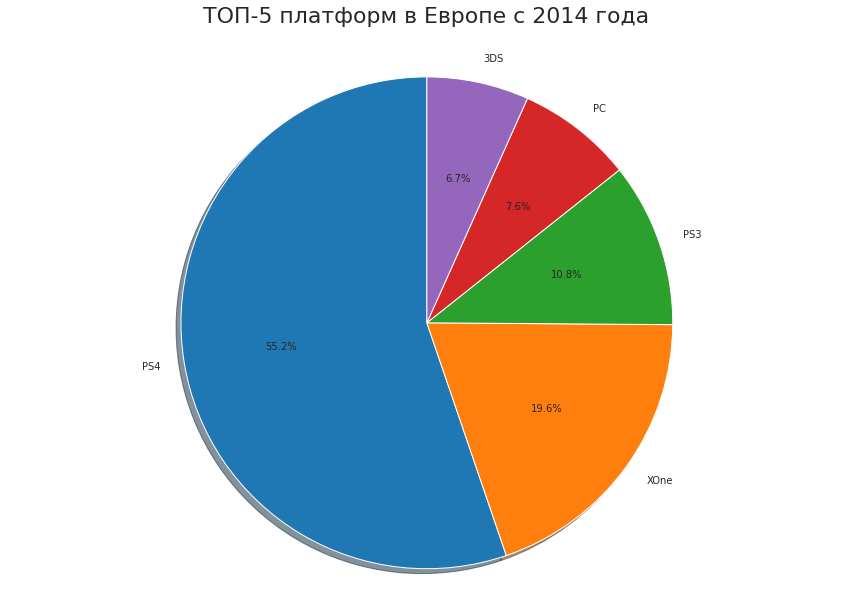

In [ ]:
labels = select(sql)['platform']
sizes = select(sql)['total_eu_sales']

fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  
plt.title('ТОП-5 платформ в Европе с 2014 года' + '\n', fontsize = 22);
plt.show()

In [ ]:
sql = '''
SELECT SUM(eu_sales) as total_eu_sales,
t.genre, t.release_year
FROM df_filtered t
WHERE t.eu_sales NOT NULL
AND t.release_year > 2013
GROUP BY t.genre
ORDER BY SUM(eu_sales) desc
LIMIT 5
'''

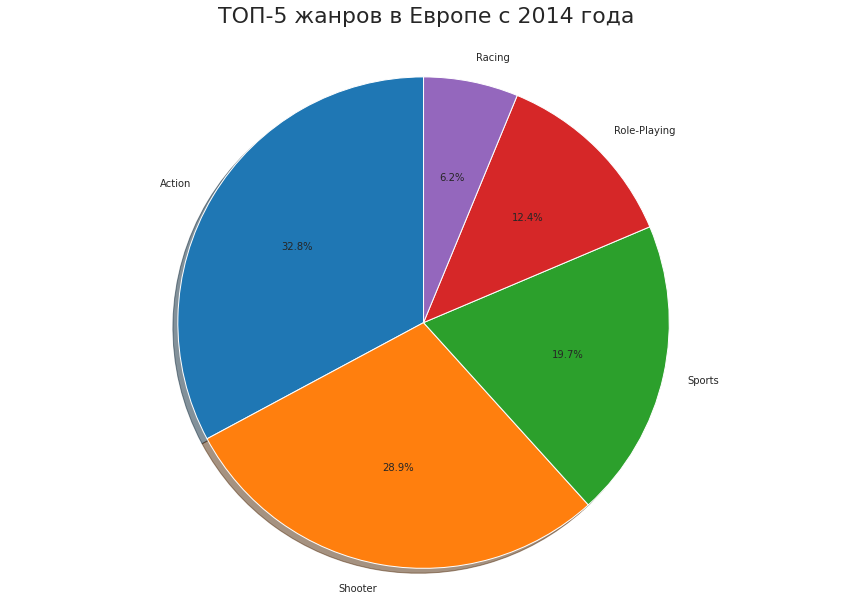

In [ ]:
labels = select(sql)['genre']
sizes = select(sql)['total_eu_sales']

fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  
plt.title('ТОП-5 жанров в Европе с 2014 года' + '\n', fontsize = 22);
plt.show()

In [ ]:
sql = '''
SELECT SUM(eu_sales) as total_eu_sales,
t.rating, t.release_year
FROM df_filtered t
WHERE t.eu_sales NOT NULL
AND t.release_year > 2013
GROUP BY t.rating
ORDER BY SUM(eu_sales) desc
'''

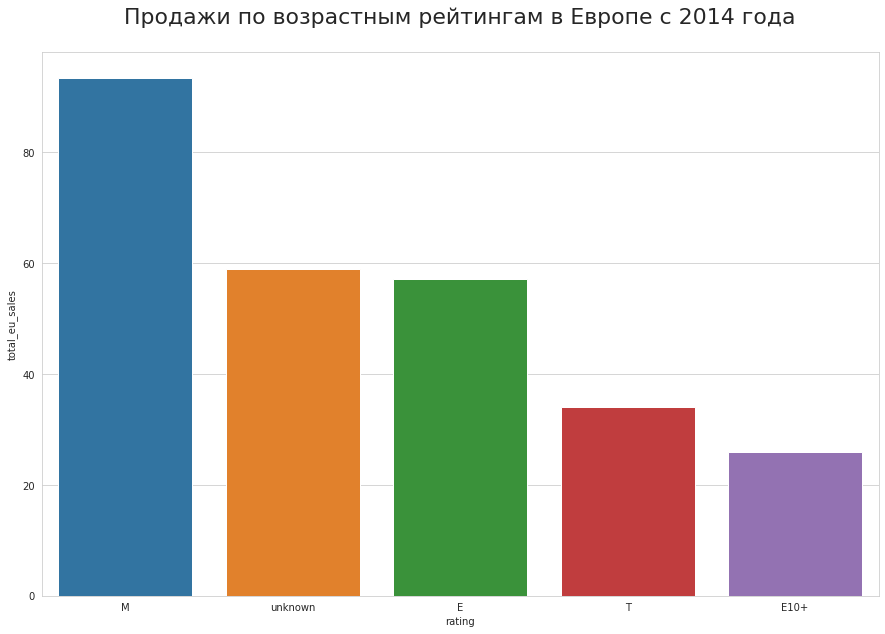

In [ ]:
sns.barplot(data=select(sql), x='rating', y='total_eu_sales');
plt.title('Продажи по возрастным рейтингам в Европе с 2014 года' + '\n', fontsize = 22);

**Портрет** усредненного **европейского игрока** в целом похож на портрет "коллеги" из Северной Америки:
* Это тоже **взросый человек**, который предпочитает играть в **Шутеры или Экшн-игры**, но играет он скорее **на PS4**, XOne значительно менее популярен в Европе
* **Топ-5 жанров**: Экшн, Шутер, Спортивные, РПГ и Гонки.
* **Топ-5 платформ**: PS4, XOne, PS3, PC, 3DS
* **Большую часть в продажах занимают игры с рейтингом M** (для взрослых), на втором месте рейтинг **E** (для всех), на третьем **T** (для подростков), четвертое занимают игры с рейтингом **E10+** (для всех геймеров старше 10) (тут всё идентично с Северной Америкой)

##Япония(JP):

А теперь составим портрет **японского геймера** последних лет:

In [ ]:
sql = '''
SELECT SUM(jp_sales) as total_jp_sales,
t.platform, t.release_year
FROM df_filtered t
WHERE t.jp_sales NOT NULL
AND t.release_year > 2013
GROUP BY t.platform
ORDER BY SUM(jp_sales) desc
LIMIT 5
'''

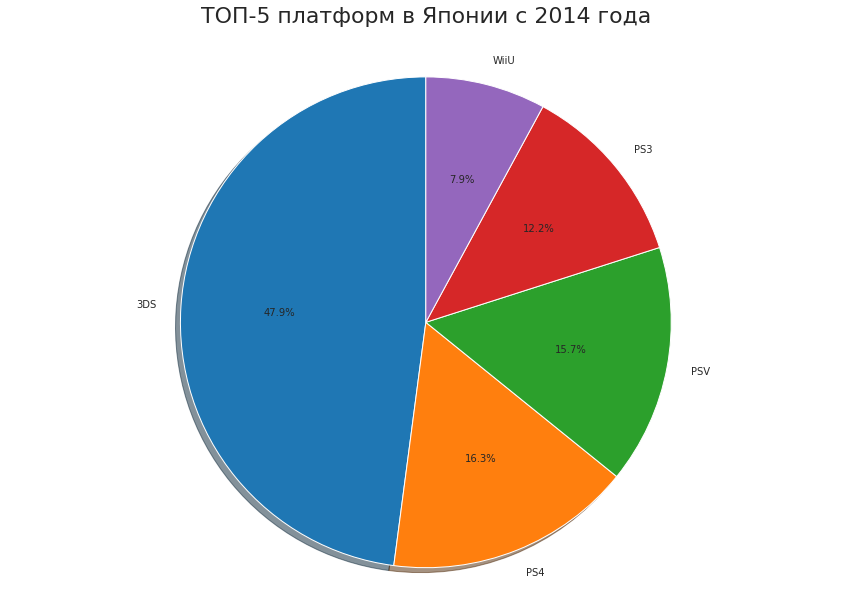

In [ ]:
labels = select(sql)['platform']
sizes = select(sql)['total_jp_sales']

fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  
plt.title('ТОП-5 платформ в Японии с 2014 года' + '\n', fontsize = 22);
plt.show()

In [ ]:
sql = '''
SELECT SUM(jp_sales) as total_jp_sales,
t.genre, t.release_year
FROM df_filtered t
WHERE t.jp_sales NOT NULL
AND t.release_year > 2013
GROUP BY t.genre
ORDER BY SUM(jp_sales) desc
LIMIT 5
'''

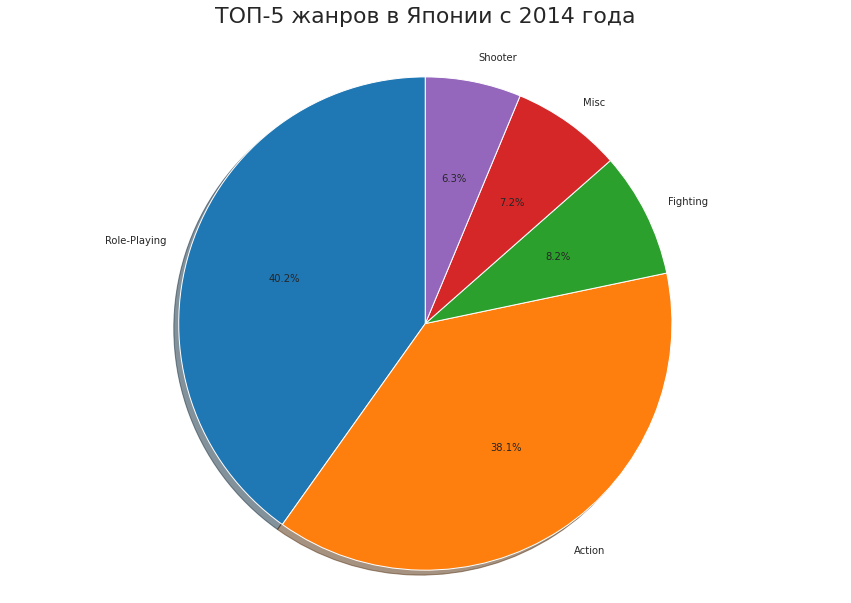

In [ ]:
labels = select(sql)['genre']
sizes = select(sql)['total_jp_sales']

fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  
plt.title('ТОП-5 жанров в Японии с 2014 года' + '\n', fontsize = 22);
plt.show()

In [ ]:
sql = '''
SELECT SUM(jp_sales) as total_jp_sales,
t.rating, t.release_year
FROM df_filtered t
WHERE t.jp_sales NOT NULL
AND t.release_year > 2013
GROUP BY t.rating
ORDER BY SUM(jp_sales) desc
'''

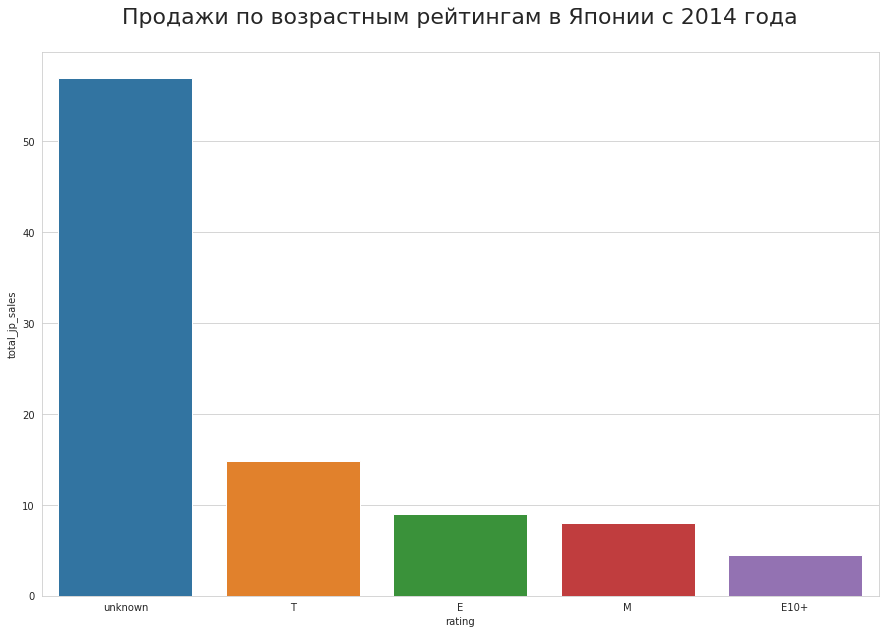

In [ ]:
sns.barplot(data=select(sql), x='rating', y='total_jp_sales');
plt.title('Продажи по возрастным рейтингам в Японии с 2014 года' + '\n', fontsize = 22);

Портрет среднего **японского геймера** разительно **отличается** от того, что мы увидели в Северной Америке и Европе:
* **Возраст** среднего игрока в Японии **определить трудно**, многие японские игры не выпускаются в Северной Америке и **не имеют рейтинга ESRB**, но он определенно предпочитает поиграть в **РПГ или Экшн** на портативной платформе **Nintendo 3DS**
* **Топ-5 жанров**: РПГ, Экшн, Файтинг, Разное, Шутер.
* **Топ-5 платформ**: 3DC, PS4, PSV, PS3, WiiU (вот это потребительский патреотизм! Все платформы в ТОП-5 от японских компаний.)
* **Большую часть в продажах занимают игры с рейтингом Т** (для подростков), на втором месте рейтинг **E** (для всех), на третьем **М** (для взрослых), четвертое занимают игры с рейтингом **E10+** (для всех геймеров старше 10) (сильно отличается от Северной Америки и Европы)


##Общий вывод:

* Вкусы геймеров из **Северной Америки** и **Европы** во многом похожи, а вот в **Японии** ситуация очень сильно отличается.
* **Выбор игровой платформы сильно зависит от региона**, люди выбирают "своё" - **американцам** мил отечественный Xbox, **японцам** - родные Nintendo и PlayStation, а вот **европейцы** за неимением собственной популярной консоли больше склоняются в сторону PlayStation и являются единтвенными, кто всё ещё более-менее активно покупают игры на компьютер.
* **Предпочтения в жанрах** игр тоже **различаются**. **Американские и европейские игроки** единодушно любят Шутеры, Экшены, Спортивные игры и РПГ, а вот замыкает пятёрку Разное и Гонки соответственно. **Японцы** же фанатеют от РПГ, которые у них занимают 40% рынка (наибольшая доля для одного жанра среди регионов), так же любят Экшн-игры и намного меньшие доли имеют Файтинги, Разное и Шутеры.
* **Распределение продаж по возрастным категориям** в **Северной Америке** и **Европе** очень схоже и доминируют **игры для взрослой аудитории**, а вот **в Японии** многие игры **не имеют рейтинга от ESRB** и мы **не можем точно оценить распределение по возростам**, но игры с подростковым рейтингом определенно пользуются спросом.

#ПРОВЕРКА ГИПОТЕЗ:

Приступим к проверке гипотез

**Гипотеза первая:**
* Средние пользовательские рейтинги платформ Xbox One и PC одинаковые

**Нулевую гипотезу** мы формулируем как "Средние пользовательские рейтинги платформ Xbox One и PC одинаковые"

**Альтернативная** - "Средние пользовательские рейтинги платформ Xbox One и PC отличаются"

In [ ]:
xone = '''
SELECT t.user_score
FROM df_filtered t
WHERE t.user_score NOT NULL
AND t.release_year > 2012
AND t.platform  = 'XOne'
'''
pc = '''
SELECT t.user_score
FROM df_filtered t
WHERE t.user_score NOT NULL
AND t.release_year > 2012
AND t.platform = 'PC'
'''

In [ ]:
len(select(xone))

178

In [ ]:
len(select(pc))

149

In [ ]:
sample_1 = select(xone)

sample_2 = select(pc)

alpha = .05 

results = st.ttest_ind(
    sample_1, 
    sample_2)

print('p-значение:', results.pvalue)

if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу") 


p-значение: [0.26800971]
Не получилось отвергнуть нулевую гипотезу


**Вывод:**

**Не получилось отвергнуть нулевую гипотезу**. Выходит, что средние пользовательские рейтинги платформ Xbox One и PC **одинаковые**.

**Гипотеза вторая:**
* Средние пользовательские рейтинги жанров Action и Sports разные.

**Нулевую гипотезу** мы формулируем как "Средние пользовательские рейтинги жанров Action и Sports одинаковы"

**Альтернативную** как "Средние пользовательские рейтинги жанров Action и Sports разные"

In [ ]:
action = '''
SELECT t.user_score
FROM df_filtered t
WHERE t.user_score NOT NULL
AND t.release_year > 2012
AND t.genre  = 'Action'
'''
sports = '''
SELECT t.user_score
FROM df_filtered t
WHERE t.user_score NOT NULL
AND t.release_year > 2012
AND t.genre = 'Sports'
'''

In [ ]:
len(select(action))

383

In [ ]:
len(select(sports))

147

In [ ]:
sample_1 = select(action)

sample_2 = select(sports)

alpha = .05 

results = st.ttest_ind(
    sample_1, 
    sample_2)

print('p-значение:', results.pvalue)

if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: [6.44206076e-24]
Отвергаем нулевую гипотезу


**Вывод:**

 **Отвергаем нулевую гипотезу** (Средние пользовательские рейтинги жанров Action и Sports одинаковы) Рейтинги у этих жанров **разные**

In [ ]:
select(action).mean()

user_score   68.93
dtype: float64

In [ ]:
select(sports).mean()

user_score   55.39
dtype: float64

Выходит, что средние пользовательские оценки жанров Экшн и Спортивные отличаются очень сильно.

#ИТОГОВЫЕ ВЫВОДЫ:

В ходе данного проекта мы исследовали следующие моменты:
* Как изменилось количество выпускаемых игр и объём продаж по годам (значительный рост объёмов начался с 1996, а после достижения пика в 2007 - 2011 наступил резкий спад, который в данный момент продолжается)
* Динамику популярности и срок жизни различных игровых платформ (**средняя продолжительность жизни** популярной платформы составляет **7 лет**, в актуальный отрезок времени **наиболее популярны** в мире **PlayStation4, XboX One, PlayStation VIta, Nintendo WiiU** и **Nintendo 3DS**, но и их продажи снижаются согласно общему тренду. Многие платформы (PSP, DS, Wii, X360, PS3, WiiU, PC) в актуальный период полностью или практически полностью **утратили актуальность**.
* Выбрали наиболее **релевантный период для анализа** и построения прогноза (2013 - 2016). Этот период был выбран из-за того, что он имеет актуальный набор популярных платформ, включает только года входящие в период падения объемов продаж, который имеет место на рынке на текущий момент.
* **Влияние оценок** критиков и пользователей **на продажи** игр (между оценками критиков и продажами есть не очень сильная **прямая взаимосвязь** (**0.48**), а вот **оценки пользователей** на продажи **не влияют** - коэфицент корреляции **-0.08**)
* **Динамику** продаж игр **различных жанров** - в последние годы балом правят игры в жанре **Action, Shooter, Role-play** и **Sports**, хотя картина по разным регионам мира может значительно отличаться. Некоторые жанры занимающие небольшую долю рынка (Стратегии, Приключенческие, Файтинги, Симуляторы) снижают объёмы продаж меньше, чем популярные жанры, и на некоторых участках актуального периода даже демонстрировали рост. Исследование **медианных продаж** по жанрам дало **важные данные** - ряд жанров (Шутеры, Стратегии, Спортивные, Гоночные) показывают довольно высокую медиану, тогда как другие (Экшены, РПГ, Файтинги, Адвенчуры) имеют низкую медиану и очевидно обеспечивают свой успех малым числам значительно более популярных, чем в среднем по жанру игр.
* Мы проанализировали предпочтения геймеров из разных регионов (Северная Америка, Европа и Япония) и составили усредненный портрет игрока **европейские** и **северо-американские** любители видеоигр довольно **похожи** и там преобладают игры в жанрах **Action и Shooter** для взрослых на игровых консолях **PS4 И Xone**, а вот **портрет японского геймера очень сильно отличается**, к сожалению с определением возраста возникли проблемы, тк организация **ESRB** возростные рейтинги которой были в нашей таблицы работает на территории Северной Америки, а многие японские игры там не выпускаются, но мы выяснили, что японцы очень патриотичны в выборе игровых платформ - **Nintendo** и **Sony** Заняли всю первую пятерку по популярности. В Японии совершенно другой расклад по популярности жанров - **Role-play** занимают первое место и имеют наибольший процент рынка для одного жанра среи всех регионов!
* Мы **проверили две гипотезы** о равенстве средних двух генеральных савокупностей.Выяснили, что в среднем польовательские оценки на платформах **XboX One** и **PC** одинаковые, а вот срение пользовательские оценки игр жанров **Action** и **Sports** сильно отличаются)

Теперь постараемся дать магазину маркетинговые **рекомендации на следующий год**:


* Ожидаемый **хитовый продукт** на следующий год - это игра в жанре **Action или Shooter** **на платформу PS4 или XboX One** с хорошими оценками от критиков. На такие продукты стоит сделать упор.
* В последние годы **4 жанра** остаются на вершине поулярности - это **Action, Shooter, Role-play, Sports**. Вероятнее всего они и **останутся самыми продаваемыми** в следующем году, хотя снижение продаж в жанре **Action** очень велико и на это тоже стоит обратить внимание.
* **Особое внимание** нужно уделить **играм в жанре Shooter**. Они впервые за очень долгое время сместили в **2015** году с первого места игры жанра **Action** и  снижение объёма продаж **Шутеров** значительно ниже, чем у Экшенов.
* Не стоит сбрасывать со счетов **все жанры**, которые в последние годы **занимают малую долю рынка**. Некоторые из них сохраняют достаточно стабильные показатели относительно общего падения рынка. Скорее всего в случае выхода новой части популярной серии в жанрах **Strategy, Fighting, Adventure**, тираж разумного размера скорее всего найдёт своего покупателя.
* **Предпочтения геймеров в разных частях мира очень сильно различаются**. Следует **поработать над локализацией страницы нашего магазина**. Особенно тщательно нужно поработать настройки алгоритмов рекомендации и рекламные компании для потенциальных покупателей из **Японии**.